<a href="https://colab.research.google.com/github/yeon524/IDS/blob/main/TA_Team6_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("lyrics_by_year_1964_2023.csv")

df = df[(df['year'] >= 1970) & (df['year'] <= 2019)]
df = df.dropna(subset=['lyric'])

df.head()


id  year      title singer  \
171  4058660  1970      소양강처녀    김태희   
173  3773396  1970  가는 정 오는 정    남정희   
175  3622569  1970  이정표 없는 거리    김상진   
176  3621632  1970  아마도 빗물이겠지    이상열   
177  3621631  1970        난이야    이상열   

                                                 lyric  x_rated  
171  해 저문 소양강에 황혼이 지면\n외로운 갈대 밭이\n슬피 우는 두견새야\n열 여덣 ...    False  
173  아롱진 옷자락에\n서글픈 사연 안고\n내 마음은 울면서도\n겉으로는 웃으며\n사랑도...    False  
175  이리 가면 고향이오\n저리 가면 타향인데\n이정표 없는 거리\n헤매 도는 삼거리 길...    False  
176  맺지 못할 사랑이기에\n말없이 헤어졌고\n돌아서는 두발 길에\n이슬비는 내리네\n사...    False  
177  난이야 난이야\n사랑을 모두 주고\n울며 떠나간 너 바보구나\n때늦은 후회지만\n너...    False

In [2]:
df = df[(df['year'] >= 1970) & (df['year'] <= 2019)].copy()

df = df.dropna(subset=['lyric'])

In [3]:
import pandas as pd
import re
def calc_lang_ratio(text):
    hangul = re.findall(r"[가-힣]", text)
    english = re.findall(r"[A-Za-z]", text)

    h_count = len(hangul)
    e_count = len(english)
    total = len(text)

    return pd.Series({
        "hangul_ratio": h_count / total if total > 0 else 0,
        "english_ratio": e_count / total if total > 0 else 0,
        "hangul_count": h_count,
        "english_count": e_count,
        "total_chars": total
    })

lang_df = df['lyric'].apply(calc_lang_ratio)
df = pd.concat([df, lang_df], axis=1)

df.head()


id  year      title singer  \
171  4058660  1970      소양강처녀    김태희   
173  3773396  1970  가는 정 오는 정    남정희   
175  3622569  1970  이정표 없는 거리    김상진   
176  3621632  1970  아마도 빗물이겠지    이상열   
177  3621631  1970        난이야    이상열   

                                                 lyric  x_rated  hangul_ratio  \
171  해 저문 소양강에 황혼이 지면\n외로운 갈대 밭이\n슬피 우는 두견새야\n열 여덣 ...    False      0.712042   
173  아롱진 옷자락에\n서글픈 사연 안고\n내 마음은 울면서도\n겉으로는 웃으며\n사랑도...    False      0.711656   
175  이리 가면 고향이오\n저리 가면 타향인데\n이정표 없는 거리\n헤매 도는 삼거리 길...    False      0.686047   
176  맺지 못할 사랑이기에\n말없이 헤어졌고\n돌아서는 두발 길에\n이슬비는 내리네\n사...    False      0.732620   
177  난이야 난이야\n사랑을 모두 주고\n울며 떠나간 너 바보구나\n때늦은 후회지만\n너...    False      0.733668   

     english_ratio  hangul_count  english_count  total_chars  
171            0.0         136.0            0.0        191.0  
173            0.0         116.0            0.0        163.0  
175            0.0         118.0            0.0        172.0  
176            0.0         137.0            0.0        187.0  
177            0.0         146.0            0.0        199.0

In [4]:
year_ratio = df.groupby('year')[['hangul_ratio', 'english_ratio']].mean()
year_ratio.head()


hangul_ratio  english_ratio
year                             
1970      0.720243       0.000000
1971      0.714106       0.012025
1972      0.725891       0.000000
1973      0.729869       0.000000
1974      0.724830       0.000000

**Objective 1**

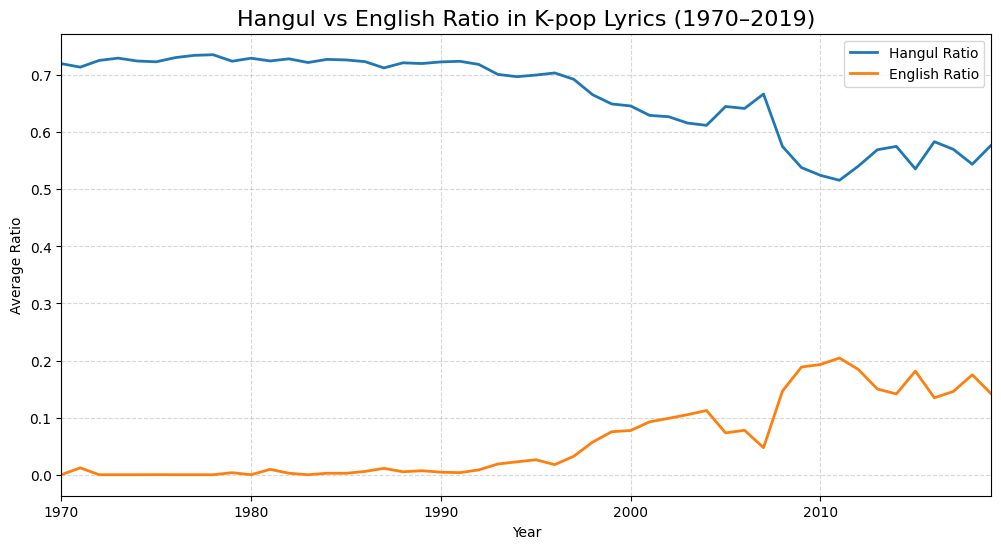

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

years = year_ratio.index

plt.plot(years, year_ratio['hangul_ratio'], label='Hangul Ratio', linewidth=2)
plt.plot(years, year_ratio['english_ratio'], label='English Ratio', linewidth=2)

plt.title("Hangul vs English Ratio in K-pop Lyrics (1970–2019)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Ratio")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.xlim(1970, 2019)

plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt

year_ratio = df.groupby('year')[['hangul_ratio', 'english_ratio']].mean().reset_index()

denom = year_ratio['hangul_ratio'] + year_ratio['english_ratio']
korean_pct  = np.where(denom > 0, year_ratio['hangul_ratio'] / denom * 100, 0)
english_pct = np.where(denom > 0, year_ratio['english_ratio'] / denom * 100, 0)

years = year_ratio['year']


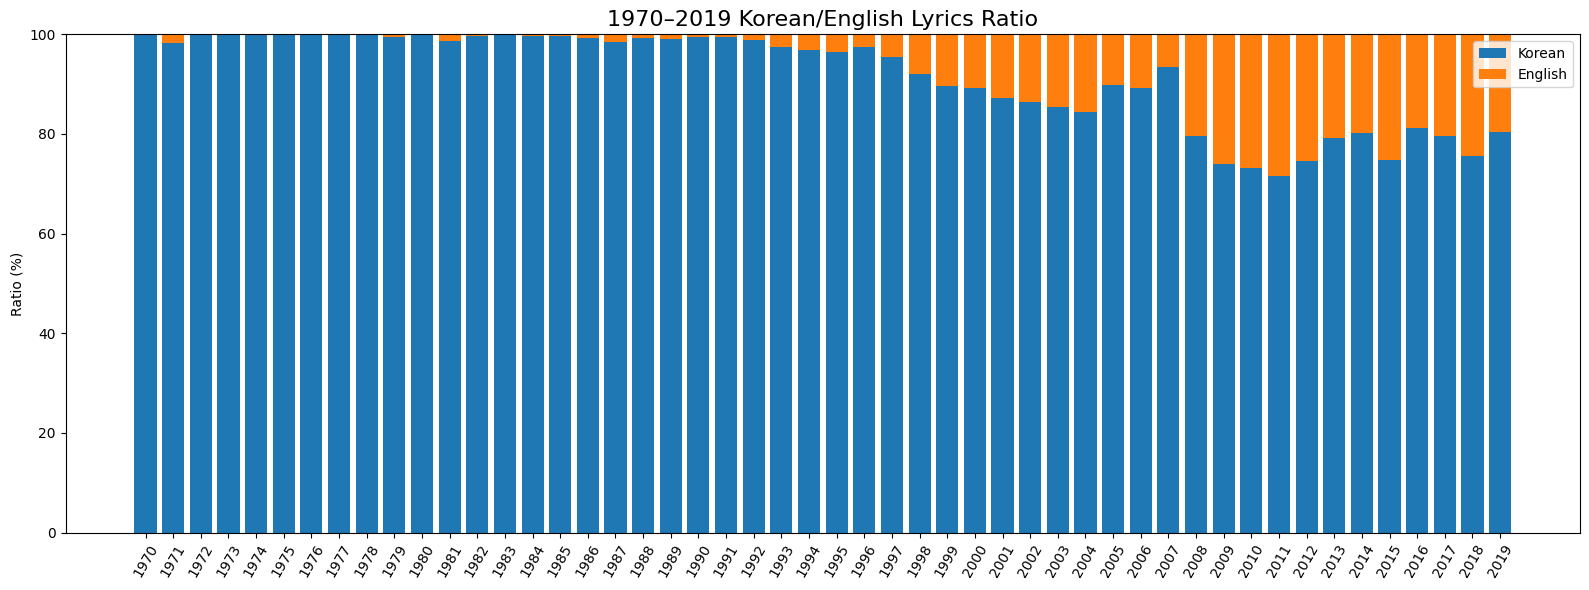

In [7]:
plt.figure(figsize=(16, 6))

plt.bar(years, korean_pct, label='Korean')

plt.bar(years, english_pct, bottom=korean_pct, label='English')

plt.title("1970–2019 Korean/English Lyrics Ratio", fontsize=16)
plt.ylabel("Ratio (%)")
plt.ylim(0, 100)

plt.xticks(years, rotation=60)
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
!pip install kiwipiepy wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 MB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 26.6 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.22.1-py3-none-any.whl size=79578111 sha256=e9f86fee03e7c414ad3878749e5636b4d9bdd8ff120f1f0e8060a6129590ff1e
  Stored in directory: /root/.cache/pip/wheels/c0/5a/4b/a1abeb73f3d31c5d010d4163bc08686d5539766084ecba0e1a
Successfully built kiwipiepy_model


In [9]:
from kiwipiepy import Kiwi
from collections import Counter

kiwi = Kiwi()

ALLOWED_TAGS = {'NNG', 'NNP', 'VV', 'VA', 'MAG'}

def tokenize_lyric(text):
    tokens = []
    for tok in kiwi.tokenize(text):
        form = tok.form
        tag  = tok.tag

        if tag not in ALLOWED_TAGS:
            continue

        if tag in {'VV', 'VA'} and form.endswith('다'):
            form = form[:-1]

        tokens.append((form, tag))
    return tokens

In [10]:
df['tokens'] = df['lyric'].apply(tokenize_lyric)

df[['year', 'title', 'tokens']].head()

year      title                                             tokens
171  1970      소양강처녀  [(해, NNG), (저물, VV), (소양강, NNP), (황혼, NNG), (지...
173  1970  가는 정 오는 정  [(아롱, NNG), (지, VV), (옷자락, NNG), (서글프, VA), (사...
175  1970  이정표 없는 거리  [(이리, MAG), (가, VV), (고향, NNG), (저리, MAG), (가,...
176  1970  아마도 빗물이겠지  [(맺, VV), (사랑, NNG), (말없이, MAG), (헤어지, VV), (돌...
177  1970        난이야  [(사랑, NNG), (모두, MAG), (주, VV), (울, VV), (떠나가,...

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def make_wordcloud(tokens, title, max_words=200):
    freq = Counter(tokens)
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=600,
        max_words=max_words
    ).generate_from_frequencies(freq)

    plt.figure(figsize=(6,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [12]:
!apt-get -qq update
!apt-get -qq install -y fonts-nanum


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 117528 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [13]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

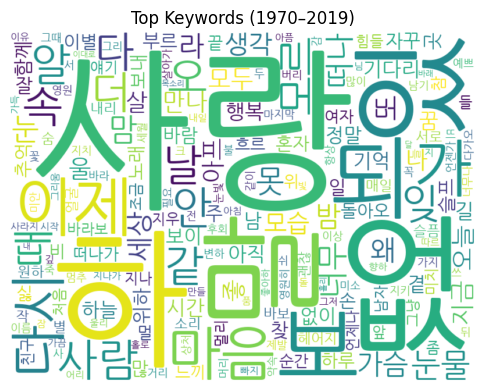

In [14]:
all_korean_tokens = [form for row in df['tokens'] for form, tag in row]

make_wordcloud(all_korean_tokens, "Top Keywords (1970–2019)")

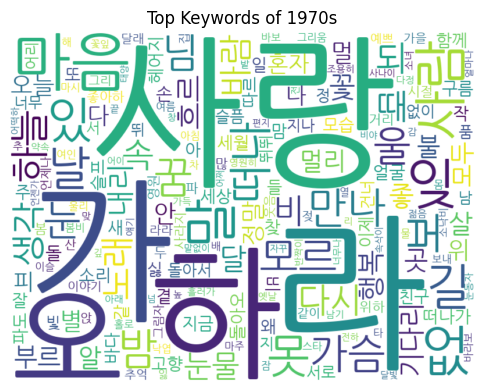

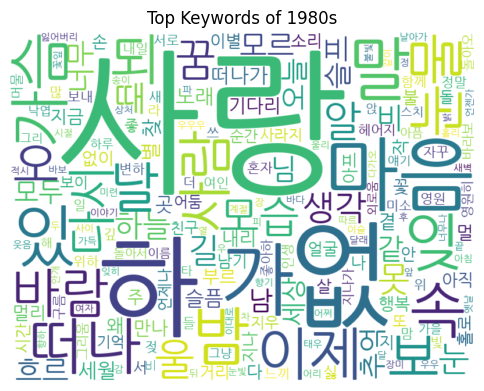

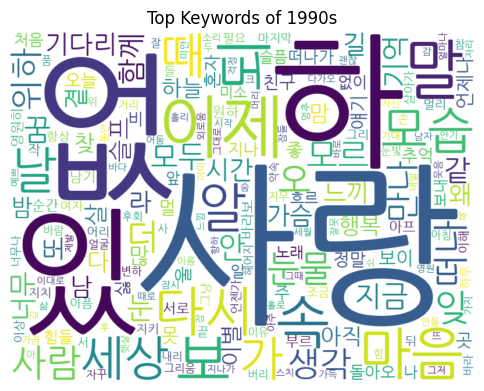

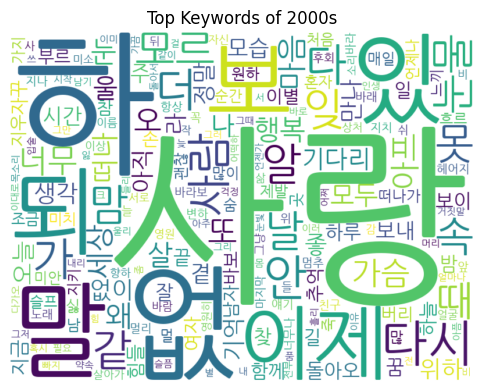

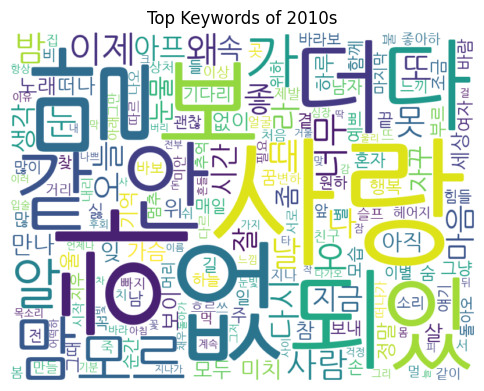

In [15]:
df['decade'] = (df['year'] // 10) * 10    # 1970, 1980, ...

for decade, group in df.groupby('decade'):
    tokens_decade = [form for row in group['tokens'] for form, tag in row]

    title = f"Top Keywords of {decade}s"

    make_wordcloud(tokens_decade, title)

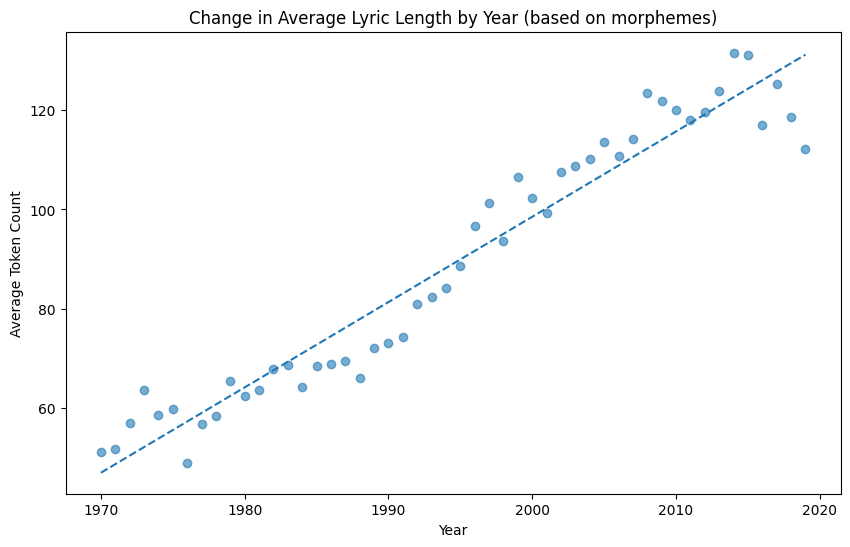

In [16]:
import numpy as np
import matplotlib.pyplot as plt

df['token_len'] = df['tokens'].apply(len)

year_len = df.groupby('year')['token_len'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(year_len['year'], year_len['token_len'], alpha=0.6)

z = np.polyfit(year_len['year'], year_len['token_len'], 1)
p = np.poly1d(z)
plt.plot(year_len['year'], p(year_len['year']), linestyle='--')

plt.xlabel('Year')
plt.ylabel('Average Token Count')
plt.title('Change in Average Lyric Length by Year (based on morphemes)')
plt.show()

In [17]:
from collections import defaultdict

pos_counts = defaultdict(Counter)

for row in df['tokens']:
    for form, tag in row:
        pos_counts[tag][form] += 1

POS_MAP = {
    'NNG': 'NOUN',
    'NNP': 'NOUN',
    'VV': 'VERB',
    'VA': 'ADJ',
    'MAG': 'ADV'
}

grouped_counts = defaultdict(Counter)
for tag, cnt in pos_counts.items():
    if tag not in POS_MAP:
        continue
    big = POS_MAP[tag]
    for word, c in cnt.items():
        grouped_counts[big][word] += c

In [18]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

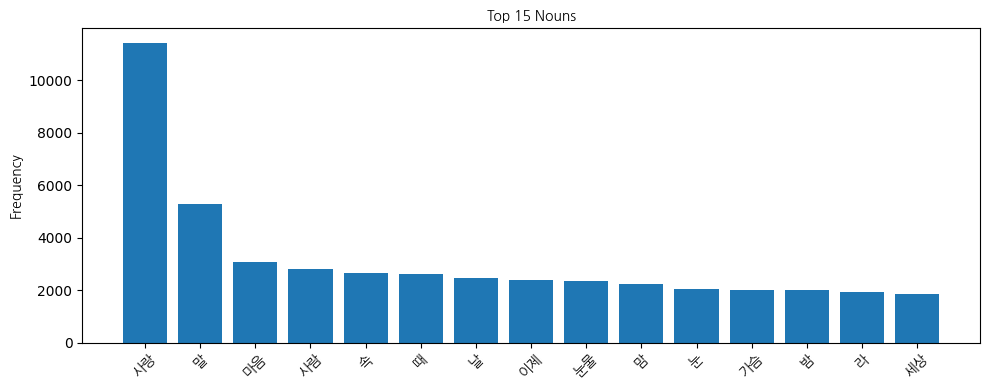

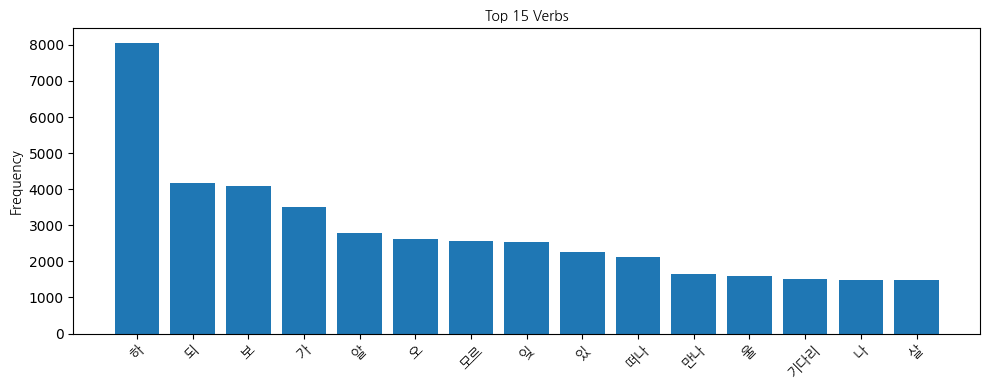

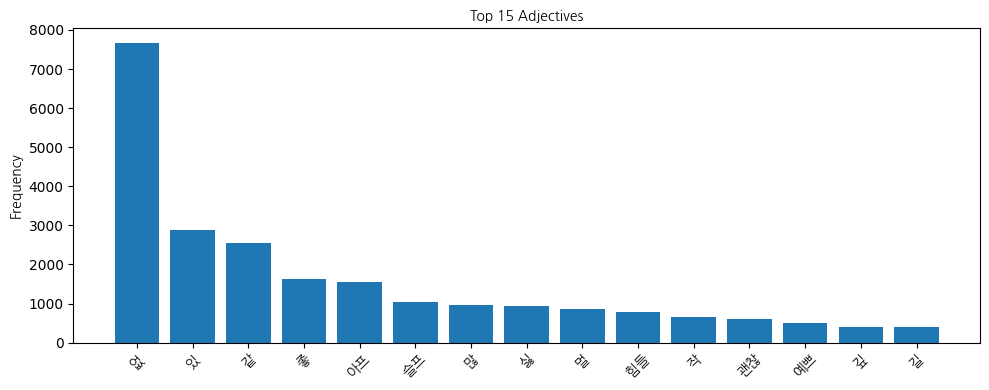

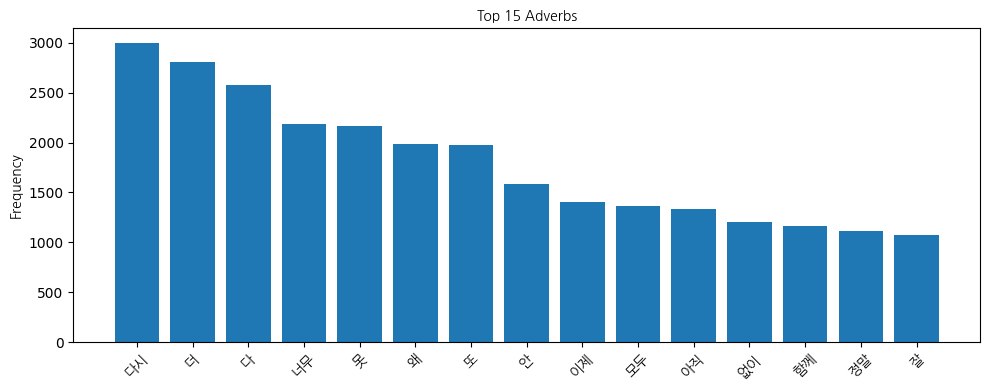

In [19]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

kfont = fm.FontProperties(fname=font_path)

def plot_top_words(counter, title, top_n=15):
    top = counter.most_common(top_n)
    words = [w for w, c in top]
    counts = [c for w, c in top]

    plt.figure(figsize=(10, 4))
    plt.bar(words, counts)

    plt.xticks(rotation=45, fontproperties=kfont)

    plt.ylabel('Frequency', fontproperties=kfont)
    plt.title(title, fontproperties=kfont)

    plt.tight_layout()
    plt.show()

plot_top_words(grouped_counts['NOUN'], "Top 15 Nouns")
plot_top_words(grouped_counts['VERB'], "Top 15 Verbs")
plot_top_words(grouped_counts['ADJ'],  "Top 15 Adjectives")
plot_top_words(grouped_counts['ADV'],  "Top 15 Adverbs")


In [20]:
stopwords = set([
    "있", "없", "때", "말", "좀", "더", "왜", "또", "난", "난다", "그냥",
    "아직", "이제", "정말", "마저", "다시", "너무", "보다", "처럼", "에게",
    "에서", "으로", "까지", "만큼", "뿐", "듯", "건", "거", "것",
    "내", "네", "나", "너", "우리", "모든",
    "은", "는", "이", "가", "을", "를", "도", "와", "과", "에", "의",
])

In [21]:
def clean_tokens(token_list):
    return [
        form for form, tag in token_list
        if form not in stopwords
        and len(form) > 1
        and tag not in ["JKS", "JKC", "JKB", "JKG", "JKO", "JX", "JC", "EP", "EF", "EC", "ETN", "ETM"]
    ]


In [22]:
df['clean_tokens'] = df['tokens'].apply(clean_tokens)

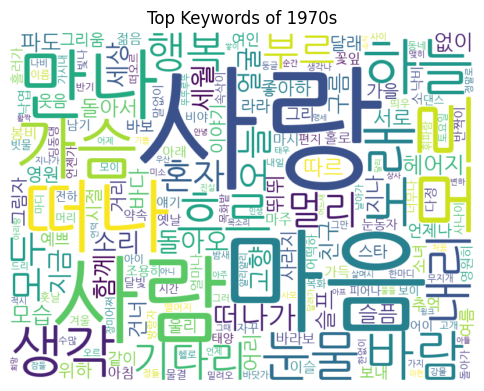

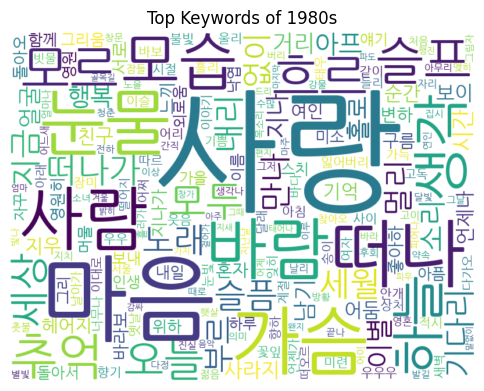

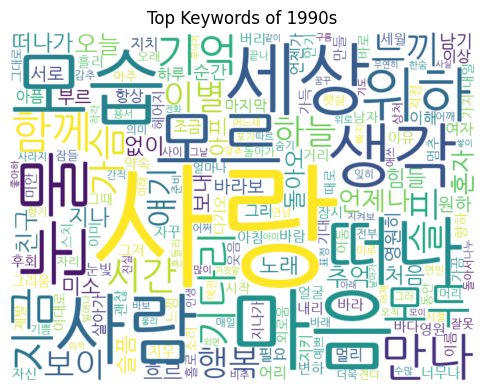

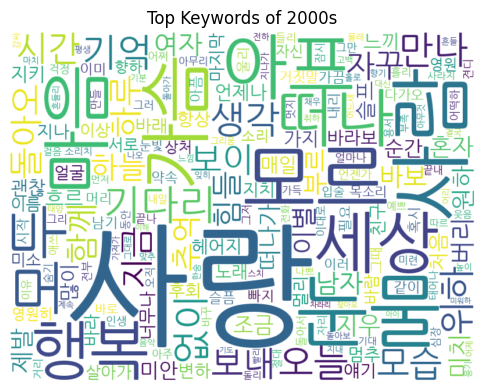

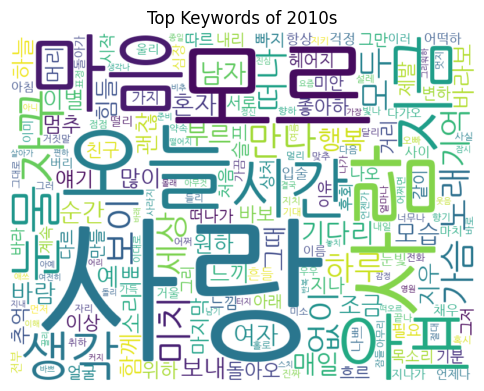

In [23]:
df['decade'] = (df['year'] // 10) * 10   # 1970, 1980, ...

for decade, group in df.groupby('decade'):
    tokens_decade = [form for row in group['clean_tokens'] for form in row]
    make_wordcloud(tokens_decade, f"Top Keywords of {decade}s")

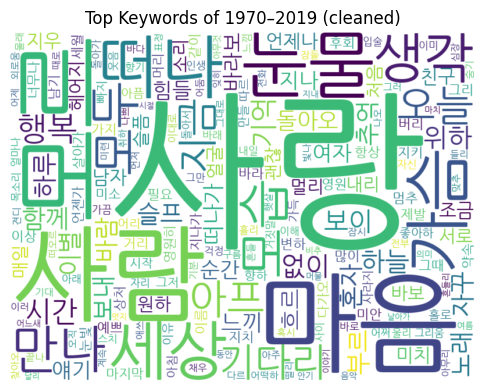

In [24]:
all_korean_tokens = [form for row in df['clean_tokens'] for form in row]
make_wordcloud(all_korean_tokens, "Top Keywords of 1970–2019 (cleaned)")

In [25]:
df['lyric_len'] = df['lyric'].apply(lambda x: len(str(x)))

longest_lyrics = df.sort_values('lyric_len', ascending=False).head(20)
print(longest_lyrics[['year', 'singer', 'title', 'lyric_len']])

shortest_lyrics = df.sort_values('lyric_len', ascending=True).head(20)
print(shortest_lyrics[['year', 'singer', 'title', 'lyric_len']])

      year           singer  \
3959  2016        BewhY 비와이   
3152  2008       BIGBANG 빅뱅   
4193  2019             기리보이   
3178  2009       SHINee 샤이니   
2771  2005              이효리   
4251  2019              pH1   
4072  2018              pH1   
3777  2015  Red Velvet 레드벨벳   
4094  2018            방탄소년단   
3976  2017               행주   
2261  1999          드렁큰 타이거   
2538  2002              윤미래   
3943  2016           싸이 PSY   
3977  2017               넉살   
3376  2011              윤미래   
3596  2013             2NE1   
3359  2010               현아   
2371  2001              YDG   
2646  2003          CB Mass   
4110  2018       Rohann 이로한   

                                                  title  lyric_len  
3959                                   The Time Goes On       2679  
3152                                        How Gee 하우지       2552  
4193        아퍼 Feat Kid Milli Lil tachi 김승민 NOEL C JAMM       2291  
3178                                     Ring Ding Dong       2205  
277

In [26]:
!sudo apt-get install -qq fonts-noto-cjk

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans CJK KR'
plt.rcParams['axes.unicode_minus'] = False

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 117552 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

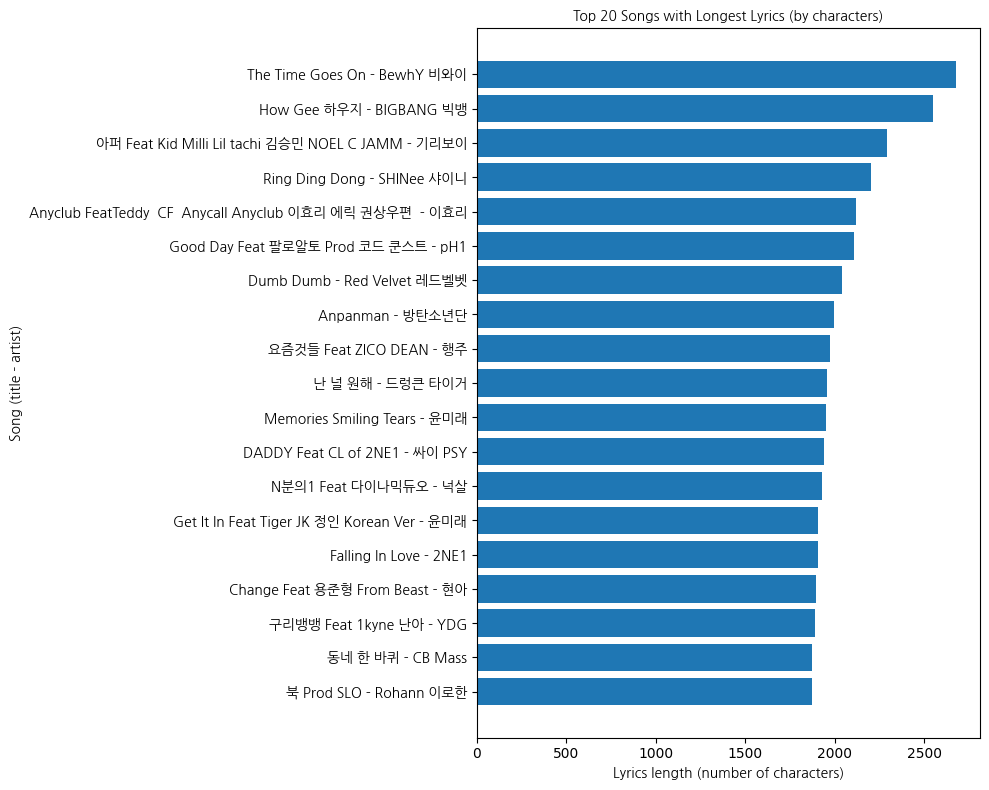

In [28]:
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt

font_prop = fm.FontProperties(fname=font_path)

top_long = (
    longest_lyrics
    .head(20)
    .sort_values('lyric_len', ascending=True)
)

plt.figure(figsize=(10, 8))
plt.barh(
    top_long['title'] + " - " + top_long['singer'],
    top_long['lyric_len']
)

plt.title("Top 20 Songs with Longest Lyrics (by characters)", fontproperties=font_prop)
plt.xlabel("Lyrics length (number of characters)", fontproperties=font_prop)
plt.ylabel("Song (title - artist)", fontproperties=font_prop)

plt.yticks(fontproperties=font_prop)

plt.tight_layout()
plt.show()


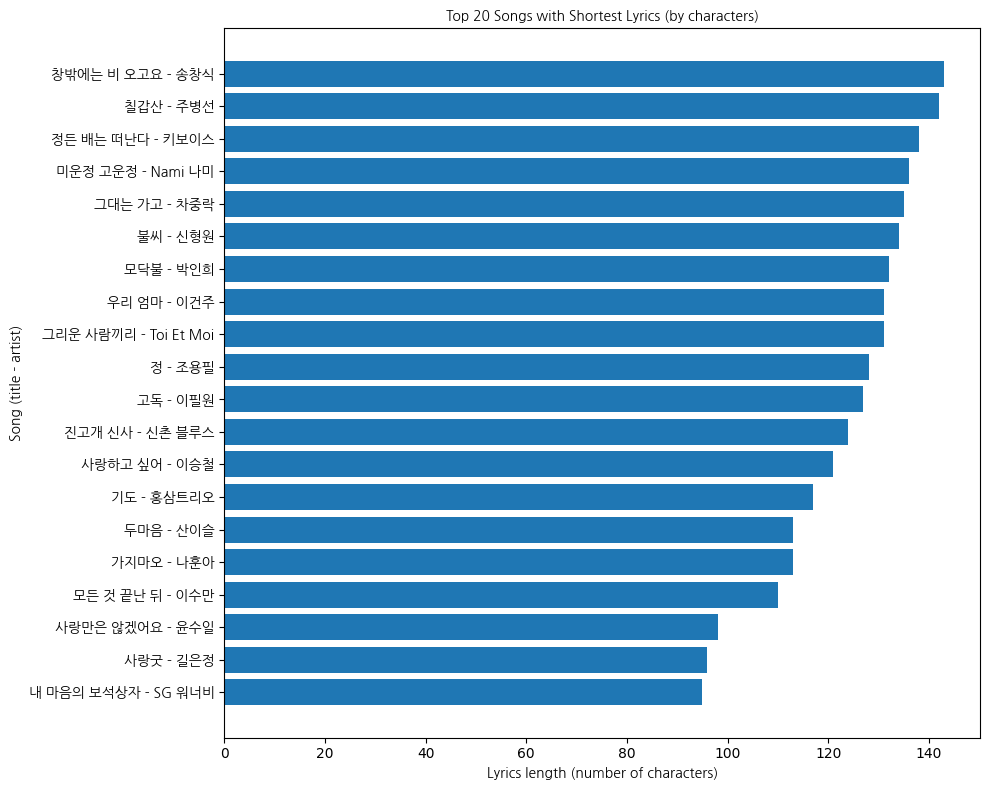

In [29]:
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt

font_prop = fm.FontProperties(fname=font_path)

top_short = (
    shortest_lyrics
    .head(20)
    .sort_values('lyric_len', ascending=True)
)

plt.figure(figsize=(10, 8))
plt.barh(
    top_short['title'] + " - " + top_short['singer'],
    top_short['lyric_len']
)

plt.title("Top 20 Songs with Shortest Lyrics (by characters)", fontproperties=font_prop)
plt.xlabel("Lyrics length (number of characters)", fontproperties=font_prop)
plt.ylabel("Song (title - artist)", fontproperties=font_prop)

plt.yticks(fontproperties=font_prop)

plt.tight_layout()
plt.show()


In [30]:
df['token_len'] = df['tokens'].apply(len)

most_tokens = df.sort_values('token_len', ascending=False).head(20)
print(most_tokens[['year', 'singer', 'title', 'token_len']])

      year                        singer  \
3959  2016                     BewhY 비와이   
3977  2017                            넉살   
3976  2017                            행주   
4193  2019                          기리보이   
2357  2000                            주석   
3600  2013                         아웃사이더   
4106  2018                      김하온 HAON   
2193  1999                          젝스키스   
4229  2019  Jvcki Wai 양홍원 Osshun Gum 한요한   
2311  2000                           업타운   
2523  2002                     YG Family   
2207  1999                           브로스   
2512  2002                       CB Mass   
2629  2003                       드렁큰 타이거   
3396  2011                            리쌍   
2211  1999                        허니 패밀리   
2724  2004                           MC몽   
3214  2009                         아웃사이더   
3893  2016                       사이먼 도미닉   
2818  2005                           MC몽   

                                            title  token_len  
3959        

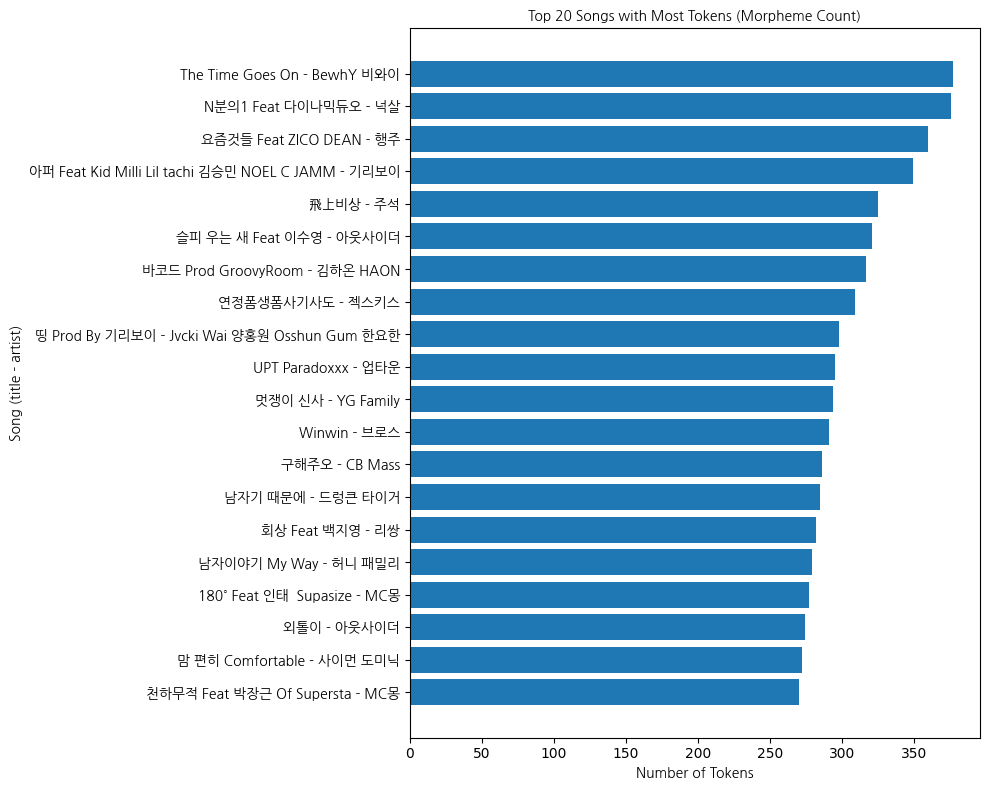

In [31]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

font_prop = fm.FontProperties(fname=font_path)

top_tokens = (
    most_tokens
    .head(20)
    .sort_values('token_len', ascending=True)   # barh는 아래→위로 증가
)

plt.figure(figsize=(10, 8))

plt.barh(
    top_tokens['title'] + " - " + top_tokens['singer'],
    top_tokens['token_len']
)

plt.title("Top 20 Songs with Most Tokens (Morpheme Count)", fontproperties=font_prop)
plt.xlabel("Number of Tokens", fontproperties=font_prop)
plt.ylabel("Song (title - artist)", fontproperties=font_prop)

plt.yticks(fontproperties=font_prop)

plt.tight_layout()
plt.show()


In [32]:
artist_stats = (
    df.groupby('singer')
      .agg(avg_len=('lyric_len', 'mean'), songs=('title', 'count'))
      .query('songs >= 5')
      .sort_values('avg_len', ascending=False)
      .head(20)
)

artist_stats

avg_len  songs
singer                             
드렁큰 타이거          1436.833333      6
4minute          1388.111111      9
업타운              1369.600000      5
MC몽              1308.555556     18
Red Velvet 레드벨벳  1247.500000     10
다이나믹 듀오          1247.200000      5
TWICE 트와이스       1199.666667     15
CNBLUE 씨엔블루      1197.857143      7
블락비 Block B      1193.666667      6
시크릿              1192.571429      7
씨스타              1186.571429     14
지누션              1184.833333      6
EXO              1175.555556      9
에픽하이 EPIK HIGH   1166.500000     12
BIGBANG 빅뱅       1166.228571     35
신화               1164.454545     11
마이티 마우스          1161.714286      7
2NE1             1132.368421     19
SHINee 샤이니       1127.875000      8
미쓰에이             1120.857143      7

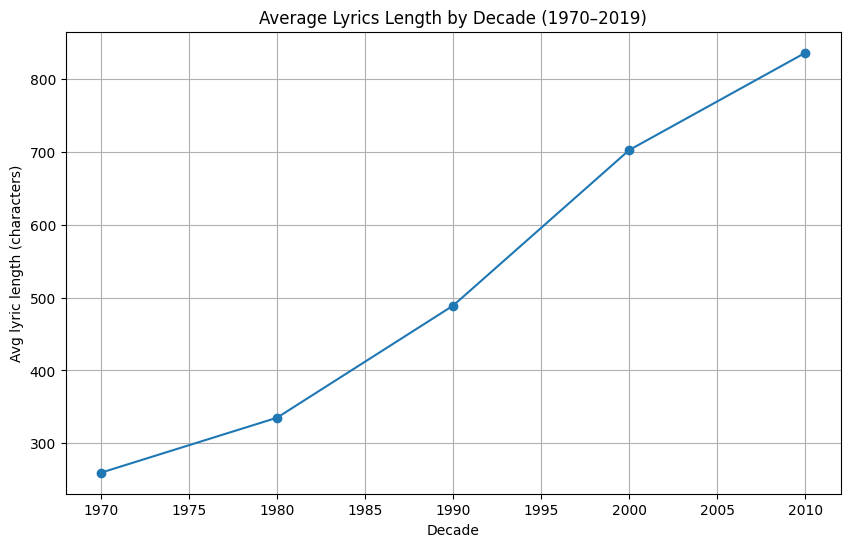

In [33]:
decade_len = df.groupby('decade')['lyric_len'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(decade_len['decade'], decade_len['lyric_len'], marker='o')
plt.title("Average Lyrics Length by Decade (1970–2019)")
plt.xlabel("Decade")
plt.ylabel("Avg lyric length (characters)")
plt.grid(True)
plt.show()


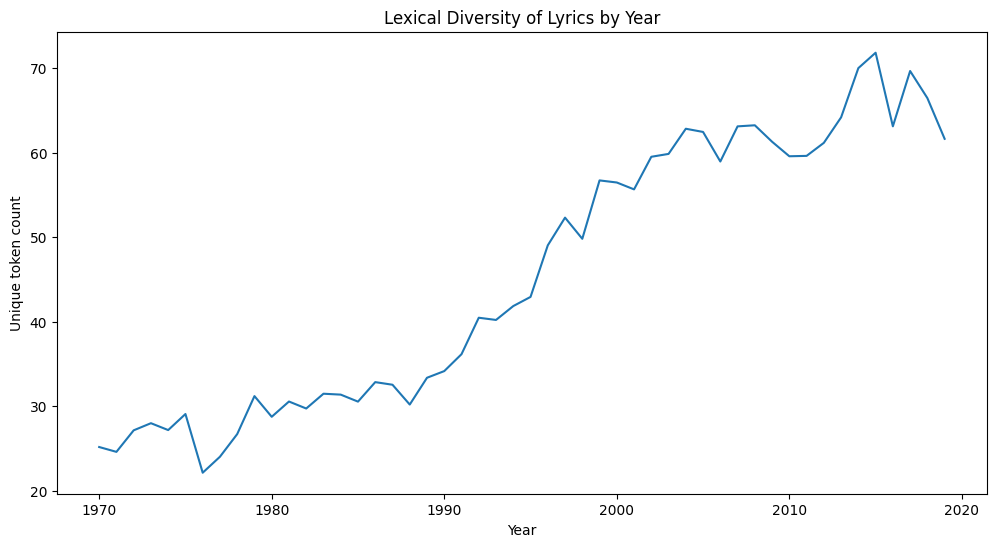

In [34]:
df['unique_tokens'] = df['tokens'].apply(lambda x: len(set([t[0] for t in x])))

lex_div = df.groupby('year')['unique_tokens'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(lex_div['year'], lex_div['unique_tokens'])
plt.title("Lexical Diversity of Lyrics by Year")
plt.xlabel("Year")
plt.ylabel("Unique token count")
plt.show()


In [35]:
from collections import Counter

def repetition_ratio(tokens):
    if len(tokens) == 0:
        return 0

    counts = Counter(tokens)

    repeated_count = sum(cnt - 1 for cnt in counts.values() if cnt > 1)
    total_count = len(tokens)

    return repeated_count / total_count

In [36]:
df['repetition_ratio'] = df['tokens'].apply(repetition_ratio)

In [37]:
yearly_rep = (
    df.groupby('year')['repetition_ratio']
      .mean()
      .reset_index()
)

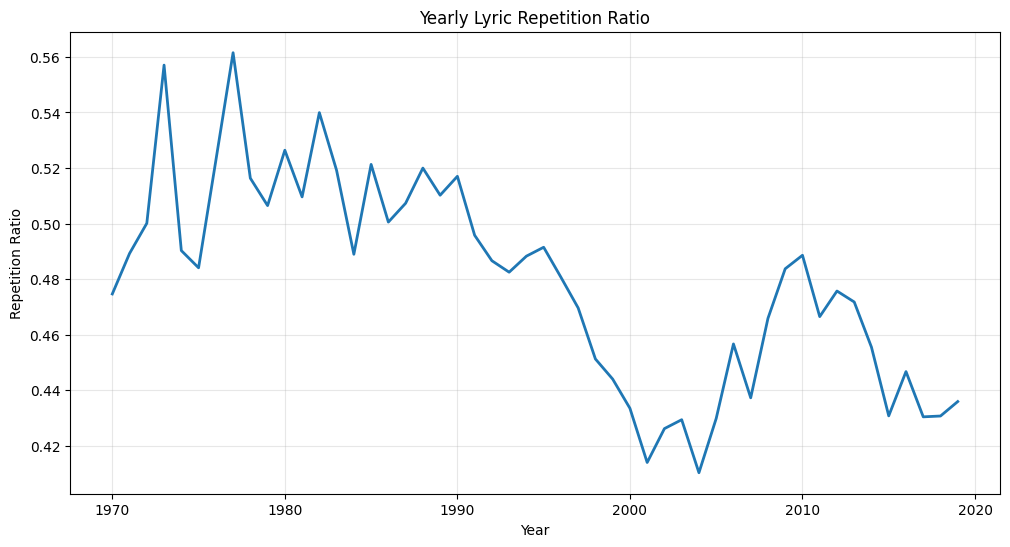

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(yearly_rep['year'], yearly_rep['repetition_ratio'], linewidth=2)

plt.title("Yearly Lyric Repetition Ratio")
plt.xlabel("Year")
plt.ylabel("Repetition Ratio")
plt.grid(alpha=0.3)
plt.show()

In [39]:
df['decade'] = (df['year'] // 10) * 10

In [40]:
from collections import Counter

decade_top_words = {}

for decade, group in df.groupby('decade'):
    all_tokens = []
    for tokens in group['tokens']:
        all_tokens.extend(tokens)

    counter = Counter(all_tokens)
    decade_top_words[decade] = counter.most_common(5)

In [41]:
for decade, words in decade_top_words.items():
    print(f"\n{decade}s Top 5 Repeated Words")
    for word, count in words:
        print(f"  {word}: {count}")


1970s Top 5 Repeated Words
  ('라', 'NNG'): 477
  ('사랑', 'NNG'): 452
  ('가', 'VV'): 390
  ('하', 'VV'): 341
  ('마음', 'NNG'): 297

1980s Top 5 Repeated Words
  ('사랑', 'NNG'): 1911
  ('없', 'VA'): 839
  ('하', 'VV'): 790
  ('마음', 'NNG'): 774
  ('가', 'VV'): 736

1990s Top 5 Repeated Words
  ('사랑', 'NNG'): 2611
  ('없', 'VA'): 2090
  ('하', 'VV'): 1789
  ('말', 'NNG'): 1079
  ('있', 'VA'): 1005

2000s Top 5 Repeated Words
  ('사랑', 'NNG'): 4049
  ('하', 'VV'): 2535
  ('없', 'VA'): 2514
  ('말', 'NNG'): 1634
  ('되', 'VV'): 1423

2010s Top 5 Repeated Words
  ('하', 'VV'): 2602
  ('사랑', 'NNG'): 2387
  ('없', 'VA'): 2012
  ('말', 'NNG'): 1864
  ('되', 'VV'): 1376


**Objective 2**

LDA

In [42]:
!pip install kiwipiepy
from kiwipiepy import Kiwi

kiwi = Kiwi()

stopwords_ko = set([
    "그대","그댈","그녀","내가","나는","나를","너","너를","너와","우리",
    "오늘","이제","정말","그냥","다시","조금","아주","마음","가슴","너무",
    "이리","저리","그리고","하지만","그래서","또한"
])

def tokenize(text):
    if not isinstance(text, str):
        return []
    tokens = []
    for t in kiwi.tokenize(text):
        w = t.form
        pos = t.tag

        if len(w) > 1 and w not in stopwords_ko and pos.startswith(("N","V","M")):
            tokens.append(w)
    return tokens

df["tokens"] = df["lyric"].apply(tokenize)

df["tokens"].head()

171    [저물, 소양강, 황혼, 외롭, 갈대, 슬피, 두견, 여덣, 딸기, 어리, 순정, ...
173    [아롱, 옷자락, 서글프, 사연, 사랑, 이름, 상처, 상처, 사랑, 사람, 모르,...
175    [고향, 타향, 이정표, 거리, 헤매, 삼거리, 차라리, 갈래, 삼거리, 내리, 바...
176    [못하, 사랑, 말없이, 헤어지, 돌아서, 이슬, 내리, 사나이, 까짓, 사랑, 때...
177    [사랑, 모두, 떠나가, 바보, 때늦, 후회, 사랑, 목메, 부르, 산울림, 흩어지...
Name: tokens, dtype: object

In [43]:
!pip install gensim
from gensim import corpora, models

texts = df["tokens"].tolist()

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=20, no_above=0.6)

corpus = [dictionary.doc2bow(text) for text in texts]

num_topics = 8
lda_model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=10,
    random_state=42
)

lda_topics = lda_model.print_topics(num_words=10)
for i, t in lda_topics:
    print(f"[LDA Topic {i}]\n{t}\n")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 43.5 MB/s eta 0:00:00
[LDA Topic 0]
0.039*"아니" + 0.021*"떠나" + 0.019*"위하" + 0.018*"제발" + 0.016*"돌아오" + 0.016*"지금" + 0.015*"버리" + 0.015*"멈추" + 0.014*"이렇" + 0.014*"기다리"

[LDA Topic 1]
0.041*"세상" + 0.022*"하나" + 0.020*"행복" + 0.016*"함께" + 0.016*"모두" + 0.015*"사람" + 0.013*"그렇" + 0.013*"지키" + 0.013*"위하" + 0.012*"보이"

[LDA Topic 2]
0.062*"사람" + 0.038*"노래" + 0.034*"부르" + 0.033*"떠나" + 0.029*"슬프" + 0.022*"떠나가" + 0.021*"눈물" + 0.018*"혼자" + 0.018*"그립" + 0.013*"때문"

[LDA Topic 3]
0.023*"만나" + 0.022*"사람" + 0.020*"생각" + 0.016*"누구" + 0.014*"지금" + 0.013*"시간" + 0.013*"그렇" + 0.011*"다른" + 0.011*"모든" + 0.010*"얘기"

[LDA Topic 4]
0.024*"눈물" + 0.019*"내리" + 0.018*"모습" + 0.016*"추억" + 0.015*"바람" + 0.015*"기억" + 0.015*"기다리" + 0.014*"시간" + 0.014*"돌아오" + 0.013*"아름답"

[LDA Topic 5]
0.050*"모르" + 0.040*"여자" + 0.034*"남자" + 0.032*"미치" + 0.020*"친구" + 0.015*"자꾸" + 0.014*"그렇" + 0.012*"세상" + 0.011*"어디" + 0.011*"그것"

[LDA Topic 6]
0.030*"아프" + 0.029*"눈물" + 0.028*"버리" + 0.02

In [44]:
def get_main_topic(lda_model, bow):
    topics = lda_model.get_document_topics(bow)
    main_topic = max(topics, key=lambda x: x[1])[0]
    return main_topic

df["lda_main_topic"] = [get_main_topic(lda_model, bow) for bow in corpus]
df[["year", "decade", "title", "lda_main_topic"]].head()

year  decade      title  lda_main_topic
171  1970    1970      소양강처녀               2
173  1970    1970  가는 정 오는 정               2
175  1970    1970  이정표 없는 거리               2
176  1970    1970  아마도 빗물이겠지               2
177  1970    1970        난이야               4

In [45]:
for i, topic in lda_model.print_topics(num_topics=8, num_words=10):
    print(f"[Topic {i}] {topic}")

[Topic 0] 0.039*"아니" + 0.021*"떠나" + 0.019*"위하" + 0.018*"제발" + 0.016*"돌아오" + 0.016*"지금" + 0.015*"버리" + 0.015*"멈추" + 0.014*"이렇" + 0.014*"기다리"
[Topic 1] 0.041*"세상" + 0.022*"하나" + 0.020*"행복" + 0.016*"함께" + 0.016*"모두" + 0.015*"사람" + 0.013*"그렇" + 0.013*"지키" + 0.013*"위하" + 0.012*"보이"
[Topic 2] 0.062*"사람" + 0.038*"노래" + 0.034*"부르" + 0.033*"떠나" + 0.029*"슬프" + 0.022*"떠나가" + 0.021*"눈물" + 0.018*"혼자" + 0.018*"그립" + 0.013*"때문"
[Topic 3] 0.023*"만나" + 0.022*"사람" + 0.020*"생각" + 0.016*"누구" + 0.014*"지금" + 0.013*"시간" + 0.013*"그렇" + 0.011*"다른" + 0.011*"모든" + 0.010*"얘기"
[Topic 4] 0.024*"눈물" + 0.019*"내리" + 0.018*"모습" + 0.016*"추억" + 0.015*"바람" + 0.015*"기억" + 0.015*"기다리" + 0.014*"시간" + 0.014*"돌아오" + 0.013*"아름답"
[Topic 5] 0.050*"모르" + 0.040*"여자" + 0.034*"남자" + 0.032*"미치" + 0.020*"친구" + 0.015*"자꾸" + 0.014*"그렇" + 0.012*"세상" + 0.011*"어디" + 0.011*"그것"
[Topic 6] 0.030*"아프" + 0.029*"눈물" + 0.028*"버리" + 0.023*"모르" + 0.021*"기억" + 0.017*"그렇" + 0.017*"아직" + 0.015*"지우" + 0.014*"이렇" + 0.013*"보내"
[Topic 7] 0.052*"당신" + 0.039

In [46]:
lda_topic_names_en = {
    0: "Holding On (Breakup)",
    1: "Hope · Comfort · Togetherness",
    2: "Sadness · Longing",
    3: "Relationships · Worries · Daily Life",
    4: "Reminiscence · Emotional Breakup",
    5: "Complex Romantic Feelings",
    6: "Post-Breakup Pain",
    7: "Poetic Sensibility · Nature Imagery"
}

df["lda_topic_name"] = df["lda_main_topic"].map(lda_topic_names_en)
df[["year", "decade", "title", "lda_main_topic", "lda_topic_name"]].head()

year  decade      title  lda_main_topic                    lda_topic_name
171  1970    1970      소양강처녀               2                 Sadness · Longing
173  1970    1970  가는 정 오는 정               2                 Sadness · Longing
175  1970    1970  이정표 없는 거리               2                 Sadness · Longing
176  1970    1970  아마도 빗물이겠지               2                 Sadness · Longing
177  1970    1970        난이야               4  Reminiscence · Emotional Breakup

In [47]:
decade_topic_table = df.groupby(["decade", "lda_topic_name"]).size().unstack(fill_value=0)
decade_topic_table

lda_topic_name  Complex Romantic Feelings  Holding On (Breakup)  \
decade                                                            
1970                                   14                     8   
1980                                   33                    14   
1990                                   48                    75   
2000                                   56                   115   
2010                                  118                   123   

lda_topic_name  Hope · Comfort · Togetherness  \
decade                                          
1970                                       25   
1980                                       30   
1990                                      154   
2000                                      144   
2010                                      112   

lda_topic_name  Poetic Sensibility · Nature Imagery  Post-Breakup Pain  \
decade                                                                   
1970                                            112                 11   
1980                                            157                 60   
1990                                             69                171   
2000                                             35                370   
2010                                             37                210   

lda_topic_name  Relationships · Worries · Daily Life  \
decade                                                 
1970                                              15   
1980                                              41   
1990                                             175   
2000                                             173   
2010                                             261   

lda_topic_name  Reminiscence · Emotional Breakup  Sadness · Longing  
decade                                                               
1970                                          70                 77  
1980                                         204                138  
1990                                         173                 77  
2000                                          53                 52  
2010                                          64                 40

In [48]:
decade_topic_ratio = decade_topic_table.div(decade_topic_table.sum(axis=1), axis=0)
decade_topic_ratio


lda_topic_name  Complex Romantic Feelings  Holding On (Breakup)  \
decade                                                            
1970                             0.042169              0.024096   
1980                             0.048744              0.020679   
1990                             0.050955              0.079618   
2000                             0.056112              0.115230   
2010                             0.122280              0.127461   

lda_topic_name  Hope · Comfort · Togetherness  \
decade                                          
1970                                 0.075301   
1980                                 0.044313   
1990                                 0.163482   
2000                                 0.144289   
2010                                 0.116062   

lda_topic_name  Poetic Sensibility · Nature Imagery  Post-Breakup Pain  \
decade                                                                   
1970                                       0.337349           0.033133   
1980                                       0.231905           0.088626   
1990                                       0.073248           0.181529   
2000                                       0.035070           0.370741   
2010                                       0.038342           0.217617   

lda_topic_name  Relationships · Worries · Daily Life  \
decade                                                 
1970                                        0.045181   
1980                                        0.060561   
1990                                        0.185775   
2000                                        0.173347   
2010                                        0.270466   

lda_topic_name  Reminiscence · Emotional Breakup  Sadness · Longing  
decade                                                               
1970                                    0.210843           0.231928  
1980                                    0.301329           0.203840  
1990                                    0.183652           0.081741  
2000                                    0.053106           0.052104  
2010                                    0.066321           0.041451

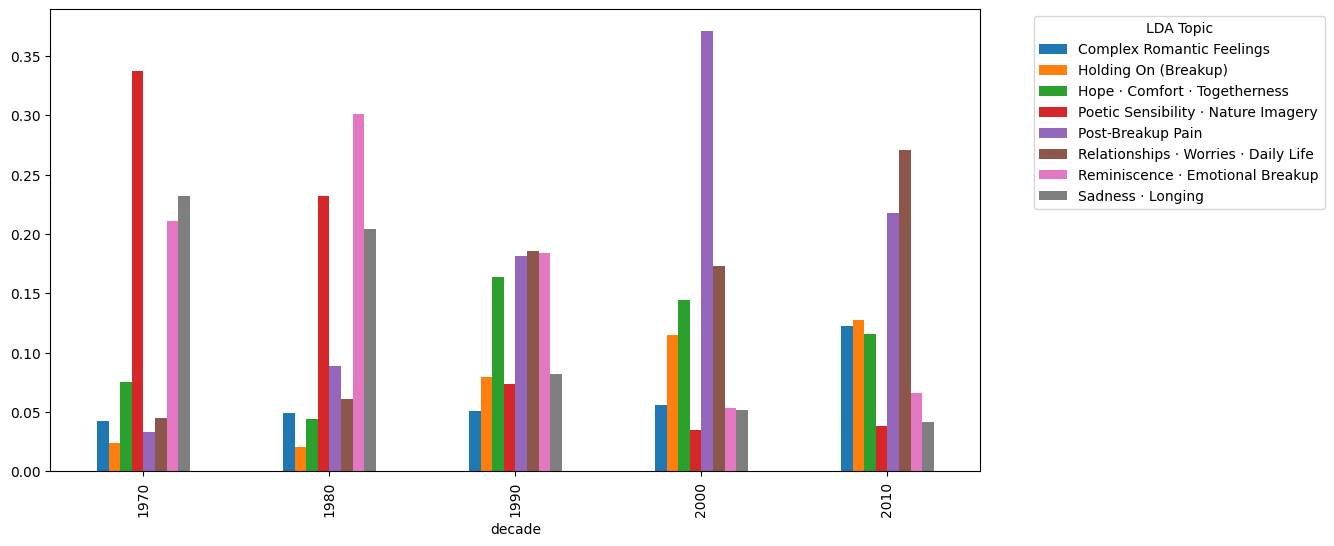

In [49]:
decade_topic_ratio.plot(kind="bar", figsize=(12, 6))
plt.legend(
    title="LDA Topic",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

NMF

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

docs_for_tfidf = [" ".join(t) for t in df["tokens"]]

tfidf = TfidfVectorizer(max_df=0.6, min_df=20, ngram_range=(1,2))
tfidf_matrix = tfidf.fit_transform(docs_for_tfidf)

num_topics = 8

nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(tfidf_matrix)
H = nmf_model.components_

feature_names = tfidf.get_feature_names_out()

def print_nmf_topics(H, names, topn=10):
    for i, topic in enumerate(H):
        top_words = [names[j] for j in topic.argsort()[::-1][:topn]]
        print(f"[NMF Topic {i}] {' / '.join(top_words)}\n")

print_nmf_topics(H, feature_names)

[NMF Topic 0] 눈물 / 아프 / 기억 / 보내 / 이별 / 추억 / 사랑 사랑 / 슬프 / 지우 / 아직

[NMF Topic 1] 당신 / 당신 사랑 / 사랑 당신 / 당신 당신 / 아름답 / 사랑 사랑 / 드리 / 떠나가 / 바치 / 세월

[NMF Topic 2] 모르 / 그렇 / 여자 / 남자 / 아니 / 자꾸 / 이렇 / 생각 / 누구 / 미치

[NMF Topic 3] 세상 / 함께 / 모든 / 위하 / 모두 / 하나 / 행복 / 느끼 / 순간 / 지키

[NMF Topic 4] 사람 / 사랑 사람 / 사람 사랑 / 사람 사람 / 만나 / 행복 / 사람 만나 / 다른 / 다른 사람 / 누구

[NMF Topic 5] 바람 / 하늘 / 내리 / 외롭 / 멀리 / 거리 / 어디 / 구름 / 하얗 / 그립

[NMF Topic 6] 노래 / 부르 / 노래 부르 / 사랑 노래 / 슬프 노래 / 슬프 / 같이 / 이름 / 친구 / 소리

[NMF Topic 7] 떠나 / 버리 / 돌아오 / 떠나가 / 떠나 버리 / 제발 / 떠나 사랑 / 남기 / 사랑 떠나 / 모습



/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [51]:
import numpy as np

df["nmf_main_topic"] = W.argmax(axis=1)
df.head()

id  year      title singer  \
171  4058660  1970      소양강처녀    김태희   
173  3773396  1970  가는 정 오는 정    남정희   
175  3622569  1970  이정표 없는 거리    김상진   
176  3621632  1970  아마도 빗물이겠지    이상열   
177  3621631  1970        난이야    이상열   

                                                 lyric  x_rated  hangul_ratio  \
171  해 저문 소양강에 황혼이 지면\n외로운 갈대 밭이\n슬피 우는 두견새야\n열 여덣 ...    False      0.712042   
173  아롱진 옷자락에\n서글픈 사연 안고\n내 마음은 울면서도\n겉으로는 웃으며\n사랑도...    False      0.711656   
175  이리 가면 고향이오\n저리 가면 타향인데\n이정표 없는 거리\n헤매 도는 삼거리 길...    False      0.686047   
176  맺지 못할 사랑이기에\n말없이 헤어졌고\n돌아서는 두발 길에\n이슬비는 내리네\n사...    False      0.732620   
177  난이야 난이야\n사랑을 모두 주고\n울며 떠나간 너 바보구나\n때늦은 후회지만\n너...    False      0.733668   

     english_ratio  hangul_count  english_count  ...  \
171            0.0         136.0            0.0  ...   
173            0.0         116.0            0.0  ...   
175            0.0         118.0            0.0  ...   
176            0.0         137.0            0.0  ...   
177            0.0         146.0            0.0  ...   

                                                tokens decade  token_len  \
171  [저물, 소양강, 황혼, 외롭, 갈대, 슬피, 두견, 여덣, 딸기, 어리, 순정, ...   1970         43   
173  [아롱, 옷자락, 서글프, 사연, 사랑, 이름, 상처, 상처, 사랑, 사람, 모르,...   1970         42   
175  [고향, 타향, 이정표, 거리, 헤매, 삼거리, 차라리, 갈래, 삼거리, 내리, 바...   1970         52   
176  [못하, 사랑, 말없이, 헤어지, 돌아서, 이슬, 내리, 사나이, 까짓, 사랑, 때...   1970         40   
177  [사랑, 모두, 떠나가, 바보, 때늦, 후회, 사랑, 목메, 부르, 산울림, 흩어지...   1970         37   

                                          clean_tokens lyric_len  \
171  [저물, 소양강, 황혼, 갈대, 슬피, 두견, 여덣, 딸기, 어리, 순정, 모르, ...       191   
173  [아롱, 옷자락, 서글프, 사연, 마음, 사랑, 이름, 상처, 상처, 사랑, 사람,...       163   
175  [이리, 고향, 저리, 타향, 이정표, 거리, 헤매, 삼거리, 이리, 저리, 차라리...       172   
176  [사랑, 말없이, 헤어지, 돌아서, 이슬, 내리, 사나이, 사랑, 맺히, 눈물, 아...       187   
177  [사랑, 모두, 떠나가, 바보, 때늦, 후회, 사랑, 목메, 부르, 산울림, 흩어지...       199   

     unique_tokens  repetition_ratio  lda_main_topic  \
171             34          0.209302               2   
173             31          0.238095               2   
175             27          0.480769               2   
176             26          0.350000               2   
177             26          0.297297               4   

                       lda_topic_name nmf_main_topic  
171                 Sadness · Longing              7  
173                 Sadness · Longing              4  
175                 Sadness · Longing              5  
176                 Sadness · Longing              0  
177  Reminiscence · Emotional Breakup              1  

[5 rows x 21 columns]

In [52]:
nmf_topic_names = {
    0: "Breakup · Tears",
    1: "Emotional Breakup · Memories",
    2: "Love · Affection",
    3: "Hope · Encouragement",
    4: "Conflicted Feelings",
    5: "Loneliness · Distance",
    6: "Music · Singing · Friendship",
    7: "Leaving · Regret"
}

df["nmf_topic_name"] = df["nmf_main_topic"].map(nmf_topic_names)
df[["title", "nmf_main_topic", "nmf_topic_name"]].head()

title  nmf_main_topic                nmf_topic_name
171      소양강처녀               7              Leaving · Regret
173  가는 정 오는 정               4           Conflicted Feelings
175  이정표 없는 거리               5         Loneliness · Distance
176  아마도 빗물이겠지               0               Breakup · Tears
177        난이야               1  Emotional Breakup · Memories

In [53]:
nmf_decade_table = df.groupby(["decade", "nmf_main_topic"]).size().unstack(fill_value=0)
nmf_decade_ratio = nmf_decade_table.div(nmf_decade_table.sum(axis=1), axis=0)
nmf_decade_ratio

nmf_main_topic         0         1         2         3         4         5  \
decade                                                                       
1970            0.045181  0.135542  0.075301  0.072289  0.129518  0.382530   
1980            0.104874  0.101920  0.064993  0.093058  0.085672  0.313146   
1990            0.108280  0.033970  0.147558  0.298301  0.082803  0.121019   
2000            0.203407  0.025050  0.234469  0.217435  0.123246  0.050100   
2010            0.144041  0.017617  0.381347  0.144041  0.081865  0.095337   

nmf_main_topic         6         7  
decade                              
1970            0.072289  0.087349  
1980            0.079764  0.156573  
1990            0.045648  0.162420  
2000            0.038076  0.108216  
2010            0.070466  0.065285

<Figure size 1400x600 with 0 Axes>

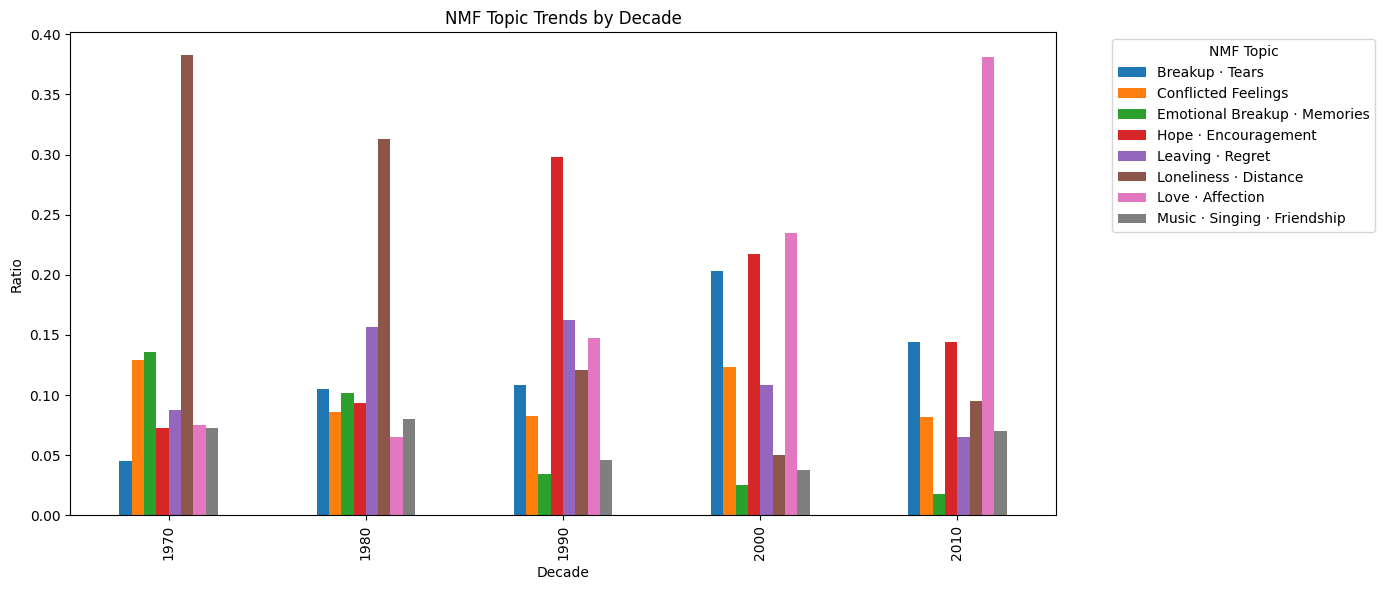

In [54]:
import matplotlib.pyplot as plt

nmf_decade_table = df.groupby(["decade", "nmf_topic_name"]).size().unstack(fill_value=0)

nmf_decade_ratio = nmf_decade_table.div(nmf_decade_table.sum(axis=1), axis=0)

plt.figure(figsize=(14, 6))

ax = nmf_decade_ratio.plot(kind="bar", figsize=(14, 6))

plt.xlabel("Decade")
plt.ylabel("Ratio")
plt.title("NMF Topic Trends by Decade")

plt.legend(title="NMF Topic", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Comparison

In [55]:
import numpy as np
import pandas as pd

if "decade" not in df.columns:
    df["decade"] = (df["year"] // 10) * 10

df_eval = df[(df["year"] >= 1970) & (df["year"] <= 2019)].copy()

texts = df_eval["tokens"].tolist()

print(df_eval.shape, df_eval["decade"].unique())

(3914, 22) [1970 1980 1990 2000 2010]


In [56]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.optimize import linear_sum_assignment

def doc_topic_to_decade_ratio(doc_topic: np.ndarray, decades: np.ndarray):
    unique_decades = np.array(sorted(pd.unique(decades)))
    out = []
    for d in unique_decades:
        idx = (decades == d)
        if idx.sum() == 0:
            out.append(np.zeros(doc_topic.shape[1]))
        else:
            out.append(doc_topic[idx].mean(axis=0))
    return unique_decades, np.vstack(out)

def normalize_rows(mat: np.ndarray, eps=1e-12):
    s = mat.sum(axis=1, keepdims=True)
    return mat / (s + eps)

def match_topics(ref_topic_word: np.ndarray, run_topic_word: np.ndarray):
    sim = cosine_similarity(run_topic_word, ref_topic_word)  # (k,k): run x ref
    row_ind, col_ind = linear_sum_assignment(-sim)  # similarity 최대화
    perm = np.zeros(ref_topic_word.shape[0], dtype=int)
    for r, c in zip(row_ind, col_ind):
        perm[c] = r
    return perm, sim

def stability_metrics(decade_ratios_runs: np.ndarray):
    R, D, K = decade_ratios_runs.shape
    flat = decade_ratios_runs.reshape(R, D*K)
    sim_mat = cosine_similarity(flat)
    sims = [sim_mat[i, j] for i in range(R) for j in range(i+1, R)]
    avg_cos = float(np.mean(sims)) if sims else 1.0
    std_cos = float(np.std(sims)) if sims else 0.0
    avg_var = float(decade_ratios_runs.var(axis=0).mean())
    return avg_cos, std_cos, avg_var

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

def run_nmf_stability(df_eval, k=8, seeds=range(10), min_df=20, max_df=0.6, ngram_range=(1,2)):
    docs = [" ".join(t) for t in df_eval["tokens"]]
    decades = df_eval["decade"].values

    tfidf = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    X = tfidf.fit_transform(docs)

    decade_ratios = []
    topic_word_mats = []
    recon_errs = []

    for seed in seeds:
        nmf = NMF(n_components=k, random_state=seed, init="nndsvda", max_iter=400)
        W = nmf.fit_transform(X)
        H = nmf.components_

        W = normalize_rows(W)
        Hn = normalize_rows(H)

        _, dr = doc_topic_to_decade_ratio(W, decades)  # (D, k)
        decade_ratios.append(dr)
        topic_word_mats.append(Hn)
        recon_errs.append(nmf.reconstruction_err_)

    ref = topic_word_mats[0]
    aligned = [decade_ratios[0]]
    seeds_list = list(seeds)
    for r in range(1, len(seeds_list)):
        perm, _ = match_topics(ref, topic_word_mats[r])
        aligned.append(decade_ratios[r][:, perm])

    aligned = np.array(aligned)
    avg_cos, std_cos, avg_var = stability_metrics(aligned)

    return {
        "model": "NMF",
        "k": k,
        "n_runs": len(seeds_list),
        "avg_cosine_similarity": avg_cos,
        "std_cosine_similarity": std_cos,
        "avg_variance": avg_var,
        "recon_error_mean": float(np.mean(recon_errs)),
        "recon_error_std": float(np.std(recon_errs)),
    }, aligned


In [58]:
from gensim import corpora, models

def lda_topic_word_matrix(lda_model, dictionary, k):
    V = len(dictionary)
    mat = np.zeros((k, V), dtype=float)
    for t in range(k):
        for wid, prob in lda_model.get_topic_terms(t, topn=V):
            mat[t, wid] = prob
    mat = normalize_rows(mat)
    return mat

def lda_doc_topic_matrix(lda_model, corpus, k):
    W = np.zeros((len(corpus), k), dtype=float)
    for i, bow in enumerate(corpus):
        for t, p in lda_model.get_document_topics(bow, minimum_probability=0.0):
            W[i, t] = p
    W = normalize_rows(W)
    return W

def run_lda_stability(df_eval, texts, k=8, seeds=range(10), no_below=20, no_above=0.6, passes=10):
    decades = df_eval["decade"].values

    dictionary = corpora.Dictionary(texts)
    dictionary.filter_extremes(no_below=no_below, no_above=no_above)
    corpus = [dictionary.doc2bow(text) for text in texts]

    decade_ratios = []
    topic_word_mats = []

    for seed in seeds:
        lda = models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=k,
            passes=passes,
            random_state=seed
        )

        W = lda_doc_topic_matrix(lda, corpus, k)
        H = lda_topic_word_matrix(lda, dictionary, k)

        _, dr = doc_topic_to_decade_ratio(W, decades)
        decade_ratios.append(dr)
        topic_word_mats.append(H)

    ref = topic_word_mats[0]
    aligned = [decade_ratios[0]]
    seeds_list = list(seeds)
    for r in range(1, len(seeds_list)):
        perm, _ = match_topics(ref, topic_word_mats[r])
        aligned.append(decade_ratios[r][:, perm])

    aligned = np.array(aligned)  # (R,D,K)
    avg_cos, std_cos, avg_var = stability_metrics(aligned)

    return {
        "model": "LDA",
        "k": k,
        "n_runs": len(seeds_list),
        "avg_cosine_similarity": avg_cos,
        "std_cosine_similarity": std_cos,
        "avg_variance": avg_var,
        "note": "gensim LDA has no reconstruction_err_ like NMF"
    }, aligned


In [59]:
seeds = range(10)
k = 8

nmf_res, nmf_aligned = run_nmf_stability(df_eval, k=k, seeds=seeds)
lda_res, lda_aligned = run_lda_stability(df_eval, texts=texts, k=k, seeds=seeds)

result_df = pd.DataFrame([nmf_res, lda_res])
result_df


model  k  n_runs  avg_cosine_similarity  std_cosine_similarity  \
0   NMF  8      10               0.986868               0.012277   
1   LDA  8      10               0.861808               0.050294   

   avg_variance  recon_error_mean  recon_error_std  \
0      0.000253         59.672061         0.002241   
1      0.002700               NaN              NaN   

                                             note  
0                                             NaN  
1  gensim LDA has no reconstruction_err_ like NMF

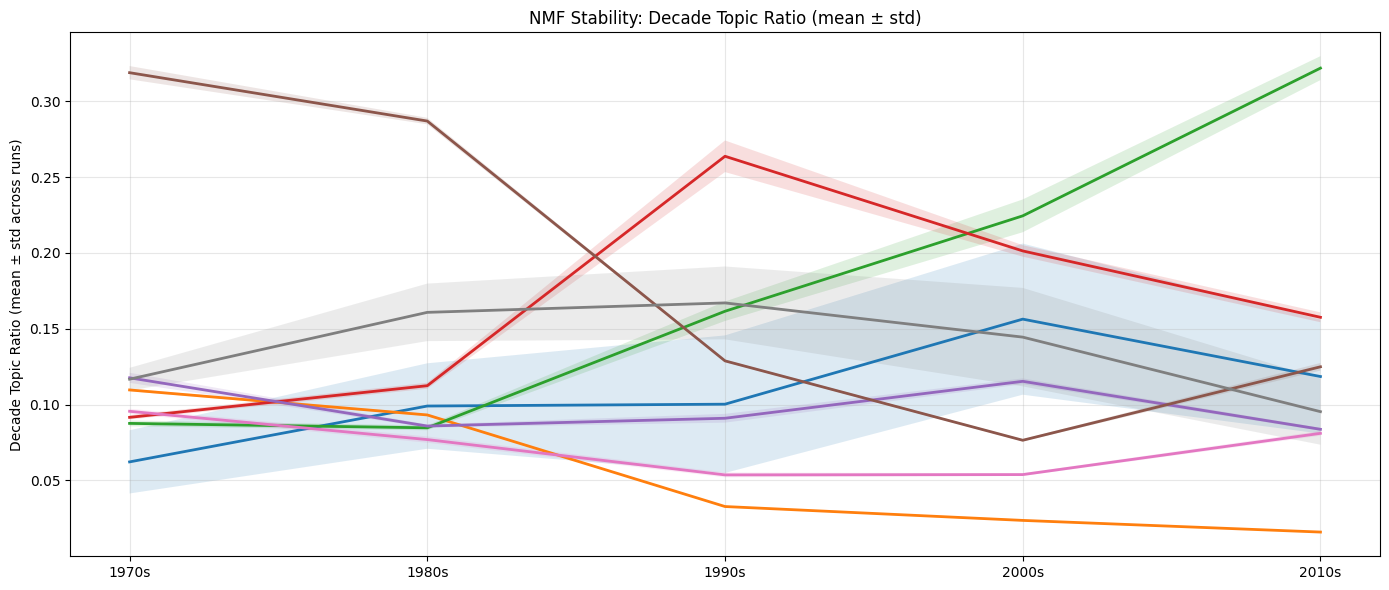

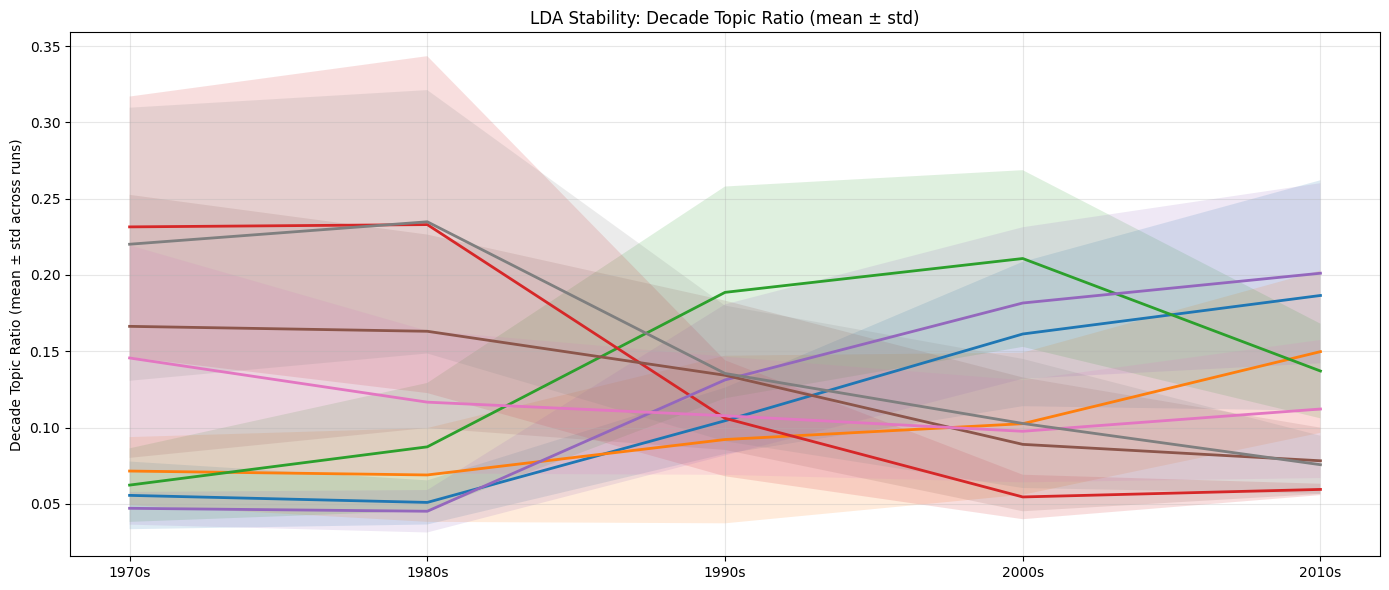

In [60]:
import matplotlib.pyplot as plt
import numpy as np

def plot_stability_band(aligned_runs, decade_labels, title=""):
    # aligned_runs: (R,D,K)
    mean = aligned_runs.mean(axis=0)   # (D,K)
    std  = aligned_runs.std(axis=0)    # (D,K)
    D, K = mean.shape
    x = np.arange(D)

    plt.figure(figsize=(14,6))
    for t in range(K):
        plt.plot(x, mean[:, t], linewidth=2)
        plt.fill_between(x, mean[:, t]-std[:, t], mean[:, t]+std[:, t], alpha=0.15)

    plt.xticks(x, decade_labels, rotation=0)
    plt.title(title)
    plt.ylabel("Decade Topic Ratio (mean ± std across runs)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

decades_sorted = sorted(df_eval["decade"].unique())
decade_labels = [f"{d}s" for d in decades_sorted]

plot_stability_band(nmf_aligned, decade_labels, "NMF Stability: Decade Topic Ratio (mean ± std)")
plot_stability_band(lda_aligned, decade_labels, "LDA Stability: Decade Topic Ratio (mean ± std)")

Predicted Topic Distribution for 2020

In [61]:
k = 8

nmf_topic_names = {
    0: "Breakup · Tears",
    1: "Emotional Breakup · Memories",
    2: "Love · Affection",
    3: "Hope · Encouragement",
    4: "Conflicted Feelings",
    5: "Loneliness · Distance",
    6: "Music · Singing · Friendship",
    7: "Leaving · Regret"
}


In [62]:
decade_topic_table = (
    df_eval
    .groupby(["decade", "nmf_main_topic"])
    .size()
    .unstack(fill_value=0)
)

df_ratio = decade_topic_table.div(
    decade_topic_table.sum(axis=1),
    axis=0
)

for t in range(k):
    if t not in df_ratio.columns:
        df_ratio[t] = 0.0

df_ratio = df_ratio[sorted(df_ratio.columns)]

df_ratio_named = df_ratio.rename(columns=nmf_topic_names)

df_ratio_named.index = df_ratio_named.index.astype(int)

df_ratio_named


nmf_main_topic  Breakup · Tears  Emotional Breakup · Memories  \
decade                                                          
1970                   0.045181                      0.135542   
1980                   0.104874                      0.101920   
1990                   0.108280                      0.033970   
2000                   0.203407                      0.025050   
2010                   0.144041                      0.017617   

nmf_main_topic  Love · Affection  Hope · Encouragement  Conflicted Feelings  \
decade                                                                        
1970                    0.075301              0.072289             0.129518   
1980                    0.064993              0.093058             0.085672   
1990                    0.147558              0.298301             0.082803   
2000                    0.234469              0.217435             0.123246   
2010                    0.381347              0.144041             0.081865   

nmf_main_topic  Loneliness · Distance  Music · Singing · Friendship  \
decade                                                                
1970                         0.382530                      0.072289   
1980                         0.313146                      0.079764   
1990                         0.121019                      0.045648   
2000                         0.050100                      0.038076   
2010                         0.095337                      0.070466   

nmf_main_topic  Leaving · Regret  
decade                            
1970                    0.087349  
1980                    0.156573  
1990                    0.162420  
2000                    0.108216  
2010                    0.065285

In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# X: decades, Y: topic ratios
X = df_ratio_named.index.values.reshape(-1, 1)
Y = df_ratio_named.values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

pred_2020 = model.predict(poly.transform([[2020]]))[0]

pred_2020 = np.clip(pred_2020, 0, None)
pred_2020 = pred_2020 / pred_2020.sum()

pred_2020


array([0.12982892, 0.02344191, 0.54514842, 0.00775397, 0.10192352,
       0.11046105, 0.0814422 , 0.        ])

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

pred_df = pd.DataFrame({
    "Topic": df_ratio_named.columns,
    "Predicted_Ratio_2020s": pred_2020
}).sort_values("Predicted_Ratio_2020s", ascending=False)

print(pred_df)


                          Topic  Predicted_Ratio_2020s
2              Love · Affection               0.545148
0               Breakup · Tears               0.129829
5         Loneliness · Distance               0.110461
4           Conflicted Feelings               0.101924
6  Music · Singing · Friendship               0.081442
1  Emotional Breakup · Memories               0.023442
3          Hope · Encouragement               0.007754
7              Leaving · Regret               0.000000


In [65]:
df_all = df_ratio_named.copy()
df_all.loc[2020] = pred_2020
df_all = df_all.sort_index()

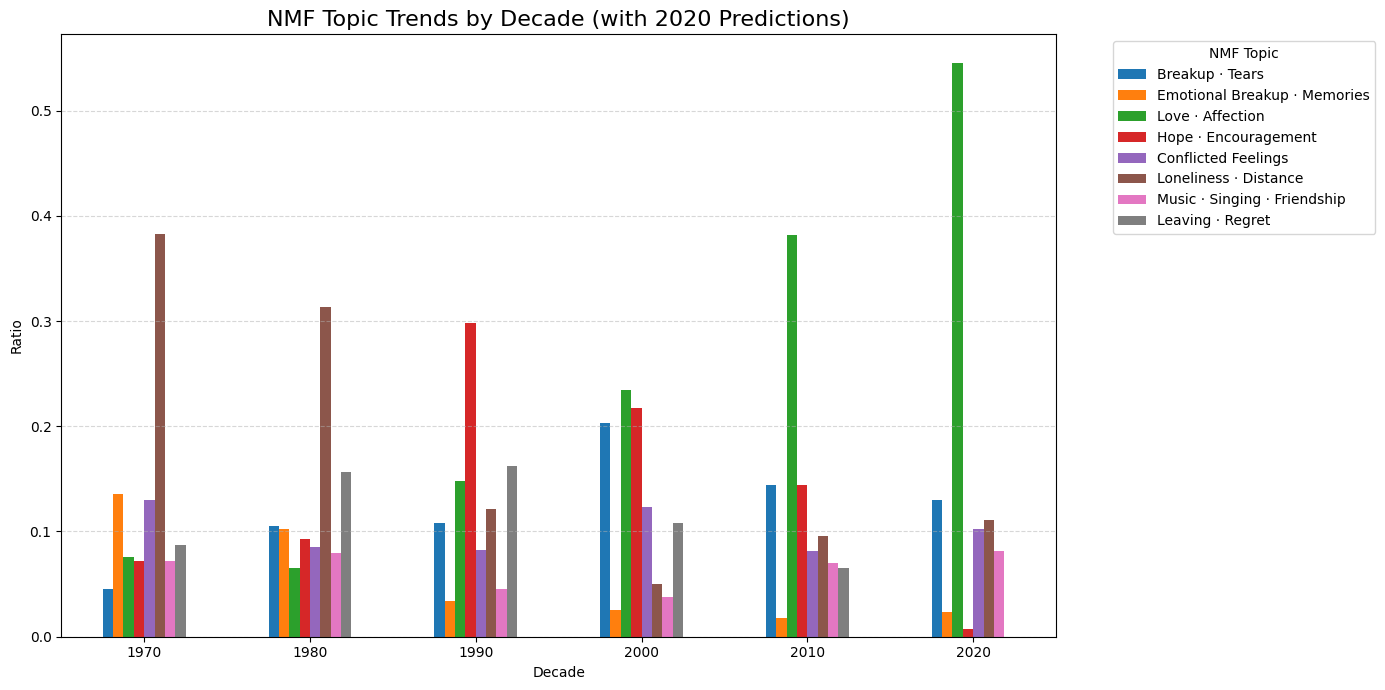

In [66]:
ax = df_all.plot(kind="bar", figsize=(14, 7))

ax.set_title("NMF Topic Trends by Decade (with 2020 Predictions)", fontsize=16)
ax.set_xlabel("Decade")
ax.set_ylabel("Ratio")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis="y", linestyle="--", alpha=0.5)

ax.legend(title="NMF Topic", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


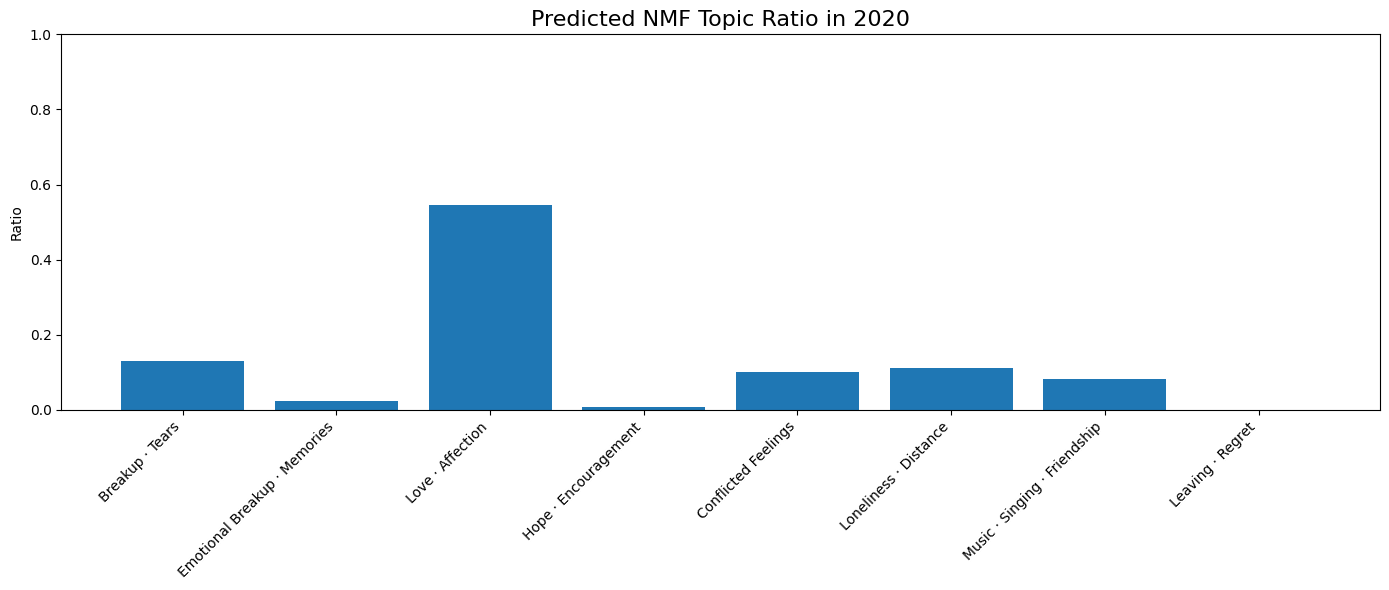

In [67]:
topic_order = list(nmf_topic_names.values())

pred_df = pd.DataFrame({
    "Topic": topic_order,
    "Predicted_Ratio_2020": pred_2020
})

plt.figure(figsize=(14, 6))
plt.bar(
    pred_df["Topic"],
    pred_df["Predicted_Ratio_2020"]
)

plt.title("Predicted NMF Topic Ratio in 2020", fontsize=16)
plt.ylabel("Ratio")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


**Objective 4**

In [68]:
import pandas as pd

df = pd.read_csv("lyrics_by_year_1964_2023.csv")

df_all = df.dropna(subset=['lyric']).copy()

df_all = df_all[df_all['lyric'].astype(str).str.strip() != ""].copy()

df_train = df_all[(df_all['year'] >= 1970) & (df_all['year'] <= 2019)].copy()

df_2020s = df_all[(df_all['year'] >= 2020) & (df_all['year'] <= 2023)].copy()

df_train.shape, df_2020s.shape


((3914, 6), (399, 6))

In [69]:
topic_names = [
    "Breakup · Tears",
    "Emotional Breakup · Memories",
    "Love · Affection",
    "Hope · Encouragement",
    "Conflicted Feelings",
    "Loneliness · Distance",
    "Music · Singing · Friendship",
    "Leaving · Regret",
]

/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


   Topic_ID                         Topic     Ratio
0         0               Breakup · Tears  0.163598
1         1  Emotional Breakup · Memories  0.133138
2         2              Love · Affection  0.053417
3         3          Hope · Encouragement  0.074875
4         4           Conflicted Feelings  0.032199
5         5         Loneliness · Distance  0.125329
6         6  Music · Singing · Friendship  0.248863
7         7              Leaving · Regret  0.168582


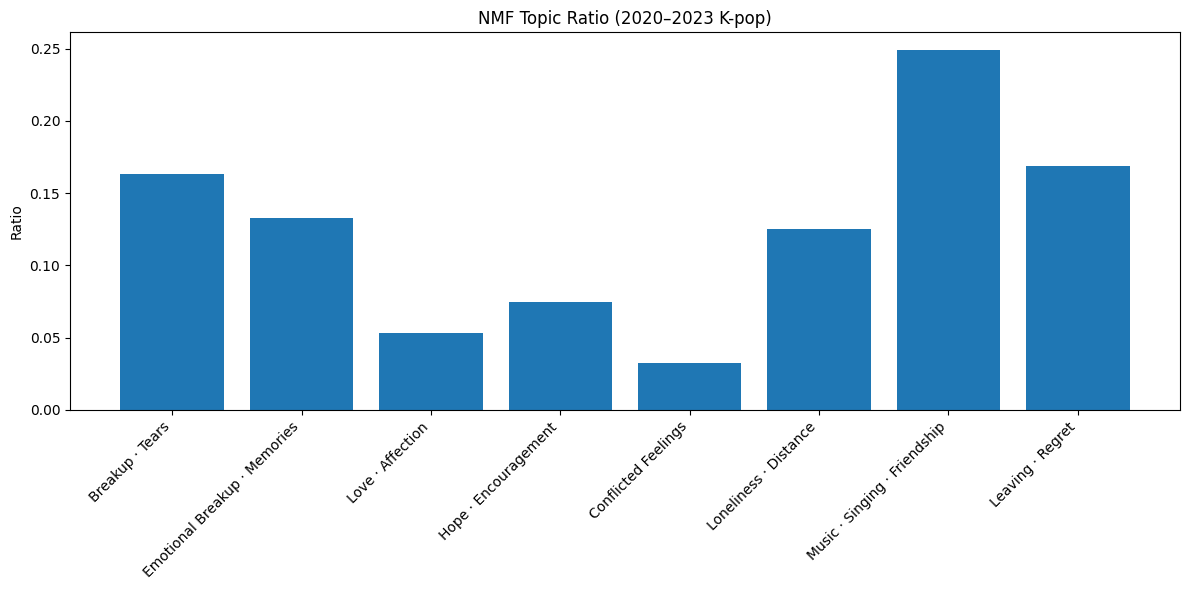

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

k = 8
nmf_topic_names = {
    0: "Breakup · Tears",
    1: "Emotional Breakup · Memories",
    2: "Love · Affection",
    3: "Hope · Encouragement",
    4: "Conflicted Feelings",
    5: "Loneliness · Distance",
    6: "Music · Singing · Friendship",
    7: "Leaving · Regret"
}

# -----------------------
# 1) Train (1970–2019)
# -----------------------
train_docs = df_train["lyric"].astype(str).tolist()

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 1)
)
X_train = tfidf_vectorizer.fit_transform(train_docs)

nmf = NMF(n_components=k, random_state=42, init="nndsvda")
W_train = nmf.fit_transform(X_train)

topic_labels = [nmf_topic_names[i] for i in range(k)]

# 2) Apply to 2020–2023 (transform only!)
test_docs = df_2020s["lyric"].astype(str).tolist()
X_test = tfidf_vectorizer.transform(test_docs)
W_test = nmf.transform(X_test)

row_sum = W_test.sum(axis=1, keepdims=True)
W_test_norm = np.divide(W_test, row_sum, out=np.zeros_like(W_test), where=row_sum != 0)

topic_ratio = W_test_norm.mean(axis=0)

ratio_df = pd.DataFrame({
    "Topic_ID": list(range(k)),
    "Topic": topic_labels,
    "Ratio": topic_ratio
})

print(ratio_df)

# 3) Plot
plt.figure(figsize=(12, 6))
plt.bar(ratio_df["Topic"], ratio_df["Ratio"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Ratio")
plt.title("NMF Topic Ratio (2020–2023 K-pop)")
plt.tight_layout()
plt.show()

In [71]:
# =========================
# Our generated lyrics (5 songs)
# =========================
my_lyrics = [
    # --- Song 1 ---
    """Burning up the night 네 이름이 flash
다른 시선 필요 없어 I move fast
숨결 하나에도 electrified
Tonight you’re mine no compromise
가까워진 듯 멀어진 vibe
내 안에 번지는 너의 sign

알 듯 말 듯한 tension 속
더 깊게 빠져가 control 못 해도 좋아
네 눈빛은 마치 code 같아
풀릴수록 더 원하게 돼
불안함도 thrill이 돼 버려
한 번 더 날 끌어당겨줘
Break

it down you pull me deeper
숨막히게 날 흔들어놔
선명하게 번져 fever
I want you I need you closer
이 밤 위로 rise up
타오르는 우리 사이
멈출 수 없어 더 가까이
I want you I need you closer

I’m locked in your gravity losing my sanity
You got me spinning like a satellite in vanity
No brakes I'm chasing the rush you create
You elevate my fate now watch me detonate
I ain’t never fallin’ I’m just all in
Your shadow on my skin yeah it’s crawlin’

Step into my zone boy I own it
You’re the spark now watch me explode it
느껴져 heartbeat 튀어오르는 lightning
거짓 하나 없이 네게만 반응해
멀어질수록 더 선명해져
너로 인해 나 완성돼
Break

it down you pull me deeper
숨막히게 날 흔들어놔
더 타오르는 이 fever
I want you I need you closer
마지막까지 rise up
터질 듯한 우리 사이
이대로 가 끝까지
I want you I need you closer""",

    # --- Song 2 ---
    """네가 스쳐 지나간 그 순간
숨결이 내 맘에 내려앉아
가까워질수록 떨리는 기분
아직은 모른 척 맞춰 가다
알잖아 난 흔들리지 않아
근데 너만 보면 균형이 깨져
조금은 불안한 이 느낌
숨겨도 다 보여 버려
너로 빛나 넌 내 day and night
끌리는 대로 움직여 난 멈추지 않아
선명해져 넌 점점 더 deep
네가 좋아 이유는 없어도
I just feel it feel it with you
가끔은 멀어진 것 같아도
다시 내 맘속으로 들어와
네 한마디면 분위기 바뀌어
그게 더 위험해 더 좋아
말보다 진실은 눈빛이야
너도 이미 다 알고 있잖아
흔들리는 맘도 숨기지 않아
우린 원래 이런 사이니까
너로 빛나 넌 내 day and night
끌리는 대로 움직여 난 멈추지 않아
선명해져 넌 점점 더 deep
네가 좋아 이유는 없어도
I just feel it feel it with you
너로 빛나 넌 내 day and night
끌리는 대로 움직여 난 멈추지 않아
선명해져 넌 점점 더 deep
네가 좋아 이유는 없어도
I just feel it feel it with you""",

    # --- Song 3 ---
    """아침보다 더 조용한 밤,
너의 한숨이 내게 스며와
멀어지는 듯 가까운 너,
그 경계에서 난 멈춰 있어
말로는 다 못 담겠어,
이 떨림이 어디서 왔는지
가끔은 혼란스러워도
또 너로 채워지는 마음

네 얼굴이 떠올라
내 귓가에 속삭이듯
조금 불안해져도
이 감정은 사라지지 않아

Into your light, 난 끌려가
내 맘이 너를 따라가
흔들리던 그림자조차
네가 오면 사라져가
너의 온도 안에 날 맡길래
Tonight, I’m falling into your light

작은 눈짓 하나에도
내 심장이 자꾸 흔들려
조금씩 더 알고 싶어
너라는 세계의 깊은 곳
멀어지면 더 선명해져
너를 찾게 되는 나의 마음
예상 못 한 순간마다
네가 날 부르고 있어
조금은 망설여도
내 발걸음은 너에게로
분명 위험한데도
왜 이렇게 편안할까

Into your light, 난 끌려가
내 맘이 너를 따라가
흔들리던 그림자조차
네가 오면 사라져가
너의 온도 안에 날 맡길래
Tonight, I’m falling into your light

한 걸음 다가와
내 안에 스며들어
두려움보다 커져만 가
너라는 색깔이
밤하늘 위에 퍼져가

Into your light, now I know
내가 원한 건 바로 너
흔들리던 마음조차
너로 인해 채워져가
숨길 수 없는 나의 마음
Tonight, I’m falling into your light""",

    # --- Song 4 ---
    """가깝게 와도 멀어진 듯
네 마음이 어디쯤인지 몰라
숨을 맞추려 할 때마다
난 자꾸 앞서가 버려
대체 왜 이런 건지
설명할 수도 없는데
너의 움직임 하나하나가
내 하루를 흔들어
그래도 난 알아
이 긴장감 속에 너도 있단 걸
말하지 않아도
서로를 알고 있는 느낌

Almost closer, 너의 orbit
내가 그 안을 맴돌고 있어
손 닿을 듯 가까워지는
이 vibe에 취해가
우린 지금 선 위를 걷고 있어
Almost closer, almost ours

너의 말투 한마디에
내 기분은 쉽게 바뀌어
멀어지는 듯했다가도
다시 내 중심으로 와
왜 이렇게 복잡한지
스스로도 잘 모르겠어
근데 이상하게도
너라면 괜찮을 것 같아
이 감정은 숨길 수 없어
너도 나와 같길 바라
조금 서툴러도
내 마음은 너에게 가고 있어

Almost closer, 너의 orbit
내가 그 안을 맴돌고 있어
손 닿을 듯 가까워지는
이 vibe에 취해가
우린 지금 선 위를 걷고 있어
Almost closer, almost ours

흔들린 마음도 너라면
조금은 괜찮아질까
정확한 말 없어도
우린 이미 알고 있어

Almost closer, 끝내 닿을 듯해
너의 온기가 느껴져와
가까워지는 heartbeat에
내 마음이 너로 가
우린 결국 서로의 orbit
Almost closer, almost ours""",

    # --- Song 5 ---
    """파란 조명 아래서
너의 실루엣만 따라가
멀어진 듯 가까운 감정
그 사이를 헤매고 있어
내가 어디에 있어도
결국 너로 향해가
애매했던 모든 감정이
너를 보면 또 달라져
불완전한 마음도
너라면 편안해지고
작은 신호 하나에도
난 금방 기울어져

Blue gravity, 날 끌어당겨
벗어날 수 없는 너의 wave
흔들리는 밤 속에서도
난 너에게 stay
너에게 닿을 수 있다면
난 어디든 가볼게

낯선 감정이 스며들고
익숙한 듯 위태로워
조금 멀리 돌아봐도
결국 너로 이어져
혼란스러워도 좋은 건
너 때문인 걸 알아
이 정도 느낌이라면
난 더 깊어져도 돼
너의 속삭임 하나에
모든 게 잠시 멈춰
이끌리는 이 감정은
이미 되돌릴 수 없어

Blue gravity, 날 끌어당겨
벗어날 수 없는 너의 wave
흔들리는 밤 속에서도
난 너에게 stay
너에게 닿을 수 있다면
난 어디든 가볼게

차가운 바람 속에서도
너만 있으면 따뜻해져
말보다 먼저 전해지는
너의 vibe에 빠져들어

Blue gravity, 넌 내 중심이 돼
날 흔들어도 난 괜찮아
이 파도 속을 헤엄쳐도
난 너에게 stay

Tonight, you’re my gravity
You’re pulling me in"""
]

=== Our 5 songs topic distribution ===


Breakup · Tears  Emotional Breakup · Memories  Love · Affection  \
Our Song 1         0.000000                      0.619850               0.0   
Our Song 2         0.166316                      0.175768               0.0   
Our Song 3         0.361830                      0.054246               0.0   
Our Song 4         0.662670                      0.000000               0.0   
Our Song 5         0.400578                      0.370392               0.0   

            Hope · Encouragement  Conflicted Feelings  Loneliness · Distance  \
Our Song 1              0.000000             0.000000               0.000000   
Our Song 2              0.011353             0.000000               0.000000   
Our Song 3              0.000000             0.051677               0.293911   
Our Song 4              0.033460             0.000000               0.151119   
Our Song 5              0.000000             0.009467               0.164244   

            Music · Singing · Friendship  Leaving · Regret  
Our Song 1                      0.380150          0.000000  
Our Song 2                      0.630240          0.016323  
Our Song 3                      0.238336          0.000000  
Our Song 4                      0.030332          0.122418  
Our Song 5                      0.055320          0.000000

=== Comparison (Our avg vs 2020–2023 avg) ===


Topic       Our  2020–2023
0               Breakup · Tears  0.318279   0.163598
1  Emotional Breakup · Memories  0.244051   0.133138
2              Love · Affection  0.000000   0.053417
3          Hope · Encouragement  0.008963   0.074875
4           Conflicted Feelings  0.012229   0.032199
5         Loneliness · Distance  0.121855   0.125329
6  Music · Singing · Friendship  0.266876   0.248863
7              Leaving · Regret  0.027748   0.168582

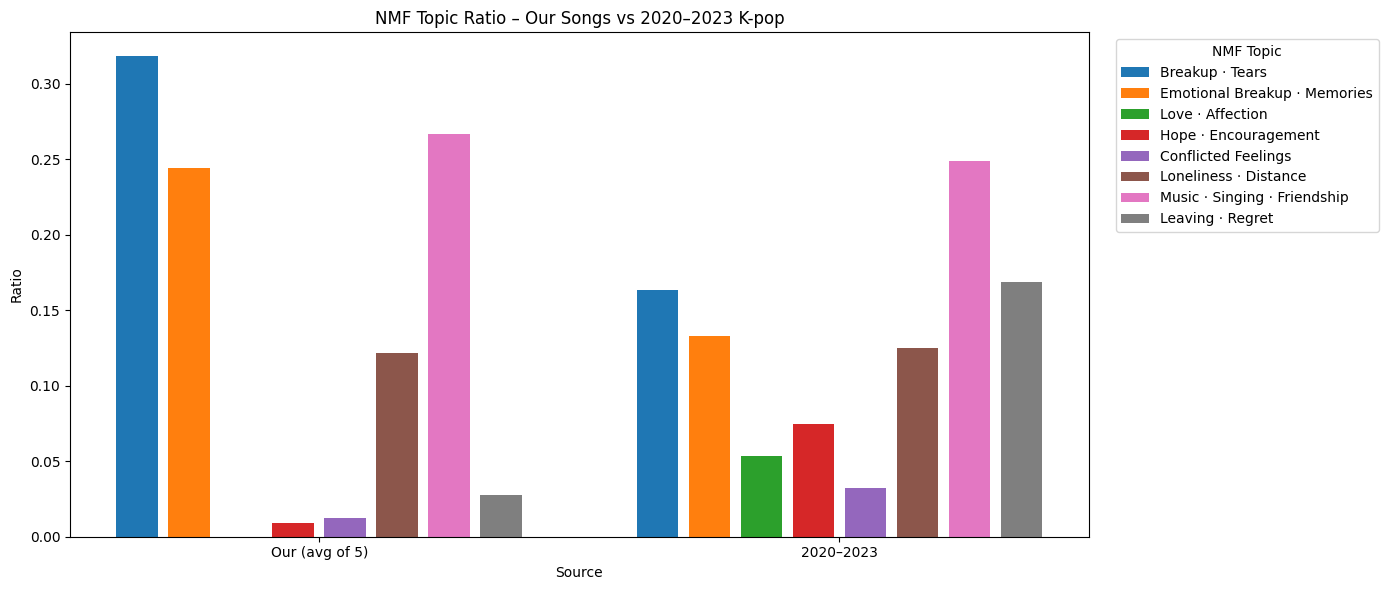

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

topic_labels = [nmf_topic_names[i] for i in range(8)]

X_my = tfidf_vectorizer.transform(my_lyrics)
W_my = nmf.transform(X_my)

row_sum = W_my.sum(axis=1, keepdims=True)
W_my_norm = np.divide(W_my, row_sum, out=np.zeros_like(W_my), where=row_sum != 0)

my_topic_df = pd.DataFrame(W_my_norm, columns=topic_labels)
my_topic_df.index = [f"Our Song {i+1}" for i in range(len(my_lyrics))]

print("=== Our 5 songs topic distribution ===")
display(my_topic_df)

my_avg = my_topic_df.mean(axis=0).values

missing = set(topic_labels) - set(ratio_df["Topic"].astype(str))
if missing:
    raise ValueError(f"ratio_df에 없는 토픽 이름이 있어: {missing}\n"
                     f"ratio_df['Topic'] 값들을 한 번 출력해서 확인해봐!")

ratio_df_sorted = (
    ratio_df.copy()
    .set_index("Topic")
    .loc[topic_labels]          # 우리가 정의한 순서대로
    .reset_index()
)

real_avg = ratio_df_sorted["Ratio"].values
assert len(real_avg) == 8, f"real_avg length is {len(real_avg)} (should be 8 topics)"

compare_df = pd.DataFrame({
    "Topic": topic_labels,
    "Our": my_avg,
    "2020–2023": real_avg
})

print("=== Comparison (Our avg vs 2020–2023 avg) ===")
display(compare_df)

sources = ["Our (avg of 5)", "2020–2023"]
x = np.arange(len(sources))
n_topics = len(topic_labels)

bar_width = 0.08
gap = 0.02
offsets = (np.arange(n_topics) - (n_topics - 1) / 2) * (bar_width + gap)

plt.figure(figsize=(14, 6))

for i, topic in enumerate(topic_labels):
    y_our = compare_df.loc[compare_df["Topic"] == topic, "Our"].values[0]
    y_real = compare_df.loc[compare_df["Topic"] == topic, "2020–2023"].values[0]

    plt.bar(x + offsets[i], [y_our, y_real], width=bar_width, label=topic)

plt.xticks(x, sources)
plt.ylabel("Ratio")
plt.xlabel("Source")
plt.title("NMF Topic Ratio – Our Songs vs 2020–2023 K-pop")
plt.legend(title="NMF Topic", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()
